<a href="https://colab.research.google.com/github/datagrad/DataScience-Projects/blob/main/Telecom_Churn_Project_Kamal_(Prediction_using_Decision_Tree_to_identify_important_Features).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom Churn Prediction

## Business Understanding

With this project, We are trying to solve one of the biggest woes of telecom industry - churn.</br> Churn is a term coined for the postpaid customer who moves out from the current operator network to some other network or stops using the services in case of prepaid.</br> The sample dataset taken here is of Indian market, where prepaid is used heavily. Hence, we will use the data segment to identify if a customer will churn or not.
<br><br> The main objective of the project will be to identify the features and their implications over a customer to churn.

## Data Understanding

In [ ]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#Loading & Reading the first five rows of the data

df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
#Checking the total number of rows and columns.

df.shape

(99999, 226)

In [ ]:
#Checking the data types of features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [ ]:
# Checking the null value percentage.

round(100*(df.isnull().sum()/len(df.index)),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

## Data Preparation

We are dealing with the telecom data of Indian and southeast Asian market where approximately 80% of the revenue comes from the top 20% customers. Hence if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In [ ]:
# Filter high-value customers with 6th and 7th month data

df1 = df
df1['total_rech_amt_6_7'] = (df1['total_rech_amt_6'] + df1['total_rech_amt_7'])/2
df1 = df1[df1['total_rech_amt_6_7'] >= df1['total_rech_amt_6_7'].quantile(0.70)]
df1.shape

(30011, 227)

In [ ]:
# Tag churners
df1['total_usage'] = df1['total_ic_mou_9'] + df1['total_og_mou_9'] + df1['vol_2g_mb_9'] + df1['vol_3g_mb_9']
df1['churn'] = np.where(df1['total_usage'], 0, 1)

# Dropping features of the ninth month
drop_churn_month = [x for x in list(df1) if x.endswith('_9')]
df1.drop(drop_churn_month, axis = 1, inplace = True)

#Checking the remaining columns
print(df1.shape)
print(df1.churn.value_counts())

(30011, 175)
0    27418
1     2593
Name: churn, dtype: int64


In [ ]:
# Dropping the two newly created features - total_rech_amt_6_7 and total_usage
df1.drop(['total_rech_amt_6_7','total_usage'], axis = 1, inplace = True)
df1.shape

(30011, 173)

In [ ]:
# Churn Rate

round(100*(sum(df1.churn/len(df1.index))),2)

8.64

In [ ]:
# Checking the null value percentage in the filtered data set.

round(100*(df1.isnull().sum()/len(df1.index)),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    0.38
std_og_t2o_mou    0.38
loc_ic_t2o_mou    0.38
                  ... 
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
churn             0.00
Length: 173, dtype: float64

In [ ]:
# Dropping the sep_vbc_3g column as this feature also belongs to 9th month

df1.drop(['sep_vbc_3g'], axis = 1, inplace = True)
df1.shape

(30011, 172)

### Data Cleaning
##### Dropping features with high null value, zero variance, high correlation & 0-values.
##### Conversion/derivation of features.
##### Imputing the remaining missing values with Iterative Imputer.

In [ ]:
# Dropping the columns having more than 45% null values.

col_null = df1.isnull().sum()/len(df1.index)
features = col_null[col_null > 0.45].index
print(features)
df1.drop(features, axis = 1, inplace = True)
print('Remaining rows and columns',df1.shape)

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')
Remaining rows and columns (30011, 142)


In [ ]:
# Checking the object data type

df1.select_dtypes(include='object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014
13,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/22/2014,8/30/2014
16,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/14/2014
17,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/30/2014,8/25/2014
...,...,...,...,...,...,...
99970,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/29/2014,8/23/2014
99974,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/27/2014,8/23/2014
99986,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/28/2014,8/18/2014
99988,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/28/2014,8/29/2014


In [ ]:
# Converting the object datatypes to datetime

today = datetime.date.today()
today = pd.to_datetime(today, errors='coerce')

df1.last_date_of_month_6 = pd.to_datetime(df1.last_date_of_month_6, errors='coerce')
df1.last_date_of_month_7 = pd.to_datetime(df1.last_date_of_month_7, errors='coerce')
df1.last_date_of_month_8 = pd.to_datetime(df1.last_date_of_month_8, errors='coerce')
df1.date_of_last_rech_6 = pd.to_datetime(df1.date_of_last_rech_6, errors='coerce')
df1.date_of_last_rech_7 = pd.to_datetime(df1.date_of_last_rech_7, errors='coerce')
df1.date_of_last_rech_8 = pd.to_datetime(df1.date_of_last_rech_8, errors='coerce')

today

Timestamp('2019-11-03 00:00:00')

In [ ]:
df1['last_date_of_month_6'] = today - df1['last_date_of_month_6']
df1['last_date_of_month_7'] = today - df1['last_date_of_month_7']
df1['last_date_of_month_8'] = today - df1['last_date_of_month_8']
df1['date_of_last_rech_6'] = today - df1['date_of_last_rech_6']
df1['date_of_last_rech_7'] = today - df1['date_of_last_rech_7']
df1['date_of_last_rech_8'] = today - df1['date_of_last_rech_8']

df1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,1952 days,1921 days,1890 days,1069.180,1349.850,...,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,1952 days,1921 days,1890 days,378.721,492.223,...,0,0,0,0,0,315,21.03,910.65,122.16,0
13,7002191713,109,0.0,0.0,0.0,1952 days,1921 days,1890 days,492.846,205.671,...,0,0,0,0,0,2607,0.00,0.00,0.00,0
16,7000875565,109,0.0,0.0,0.0,1952 days,1921 days,1890 days,430.975,299.869,...,0,0,0,0,0,511,0.00,2.45,21.89,0
17,7000187447,109,0.0,0.0,0.0,1952 days,1921 days,1890 days,690.008,18.980,...,0,0,0,0,0,667,0.00,0.00,0.00,0


In [ ]:
df1['last_date_of_month_6'] = df1['last_date_of_month_6'].astype('timedelta64[D]')
df1['last_date_of_month_7'] = df1['last_date_of_month_7'].astype('timedelta64[D]')
df1['last_date_of_month_8'] = df1['last_date_of_month_8'].astype('timedelta64[D]')
df1['date_of_last_rech_6'] = df1['date_of_last_rech_6'].astype('timedelta64[D]')
df1['date_of_last_rech_7'] = df1['date_of_last_rech_7'].astype('timedelta64[D]')
df1['date_of_last_rech_8'] = df1['date_of_last_rech_8'].astype('timedelta64[D]')
df1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,1952.0,1921.0,1890.0,1069.180,1349.850,...,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,109,0.0,0.0,0.0,1952.0,1921.0,1890.0,378.721,492.223,...,0,0,0,0,0,315,21.03,910.65,122.16,0
13,7002191713,109,0.0,0.0,0.0,1952.0,1921.0,1890.0,492.846,205.671,...,0,0,0,0,0,2607,0.00,0.00,0.00,0
16,7000875565,109,0.0,0.0,0.0,1952.0,1921.0,1890.0,430.975,299.869,...,0,0,0,0,0,511,0.00,2.45,21.89,0
17,7000187447,109,0.0,0.0,0.0,1952.0,1921.0,1890.0,690.008,18.980,...,0,0,0,0,0,667,0.00,0.00,0.00,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 142 entries, mobile_number to churn
dtypes: float64(114), int64(28)
memory usage: 32.7 MB


In [ ]:
from fancyimpute import IterativeImputer
df1_col = df1.columns
df2 = pd.DataFrame(IterativeImputer(min_value=0).fit_transform(df1))
df2.columns = df1_col

Using TensorFlow backend.


In [ ]:
df2.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,3.001100e+04,30011.0,30011.0,30011.0,30011.0,30011.0,30011.0,30011.0,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,1952.0,1921.0,1890.0,587.284404,589.135427,...,0.185132,0.173203,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,0.086402
std,6.846405e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.722413,462.897814,...,0.620418,0.582932,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,0.280961
min,7.000000e+09,109.0,0.0,0.0,0.0,1952.0,1921.0,1890.0,-2258.709000,-2014.045000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000641e+09,109.0,0.0,0.0,0.0,1952.0,1921.0,1890.0,364.161000,365.004500,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001232e+09,109.0,0.0,0.0,0.0,1952.0,1921.0,1890.0,495.682000,493.561000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001814e+09,109.0,0.0,0.0,0.0,1952.0,1921.0,1890.0,703.922000,700.788000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,1952.0,1921.0,1890.0,27731.088000,35145.834000,...,16.000000,16.000000,29.000000,35.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.000000


In [ ]:
# Removing columns with 0 variance

df2.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis=1, inplace=True)
df2.shape

(30011, 135)

### Outlier Analysis

In [ ]:
df2.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,3.001100e+04,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,587.284404,589.135427,534.857433,299.306896,307.579595,276.639879,422.280992,428.068321,386.703499,...,0.185132,0.173203,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,0.086402
std,6.846405e+05,442.722413,462.897814,492.259586,459.764012,480.800830,464.083834,468.610456,484.641202,472.719585,...,0.620418,0.582932,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,0.280961
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000641e+09,364.161000,365.004500,289.609500,43.510000,43.260000,33.985000,142.825000,141.235000,111.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001232e+09,495.682000,493.561000,452.091000,131.010000,130.440000,113.090000,289.540000,289.040000,261.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001814e+09,703.922000,700.788000,671.150000,353.310000,359.925000,297.995000,523.125000,532.695000,482.610000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000
90%,7.002167e+09,994.099000,995.557000,985.202000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2846.000000,438.970000,454.830000,394.500000,0.000000
95%,7.002287e+09,1240.793500,1261.421500,1258.555500,1153.970000,1208.175000,1115.660000,1271.470000,1286.285000,1188.460000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3179.000000,818.750000,845.315000,761.740000,1.000000
99%,7.002387e+09,1983.089500,1999.374500,1987.934400,2166.370000,2220.367000,2188.504000,2326.290000,2410.104000,2211.642000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3651.000000,1822.115000,1941.598000,1866.386000,1.000000


All of our data contains details of users who are top 20% contributers and we're trying to reduce churn in this segment. Hence we disregard any and all outliers for now.

In [ ]:
df3 = df2.drop(['mobile_number','churn'], axis=1)

# Correlation matrix
corr_matrix = df3.corr().abs()

# Select upper triange of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find the columns with correlation higher than 80%
high_corr = [column for column in upper.columns if any(upper[column]>0.80)]

print(high_corr)

['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


In [ ]:
# Dropping highly correlated features

df2.drop(high_corr, axis=1, inplace=True)
df2.shape

(30011, 107)

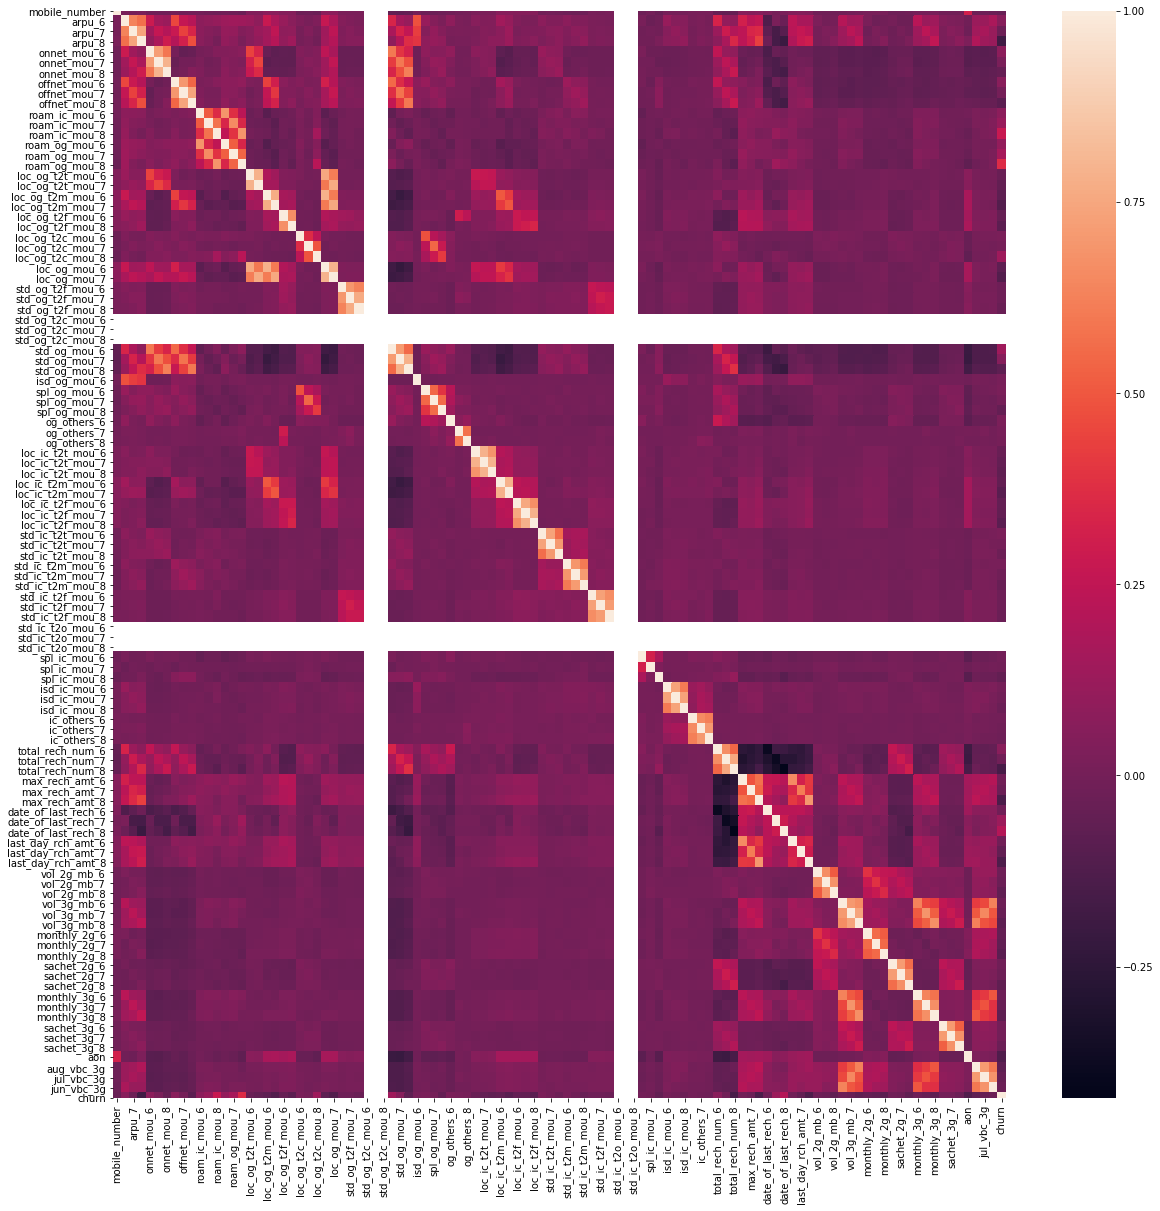

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr())
plt.show()

### EDA

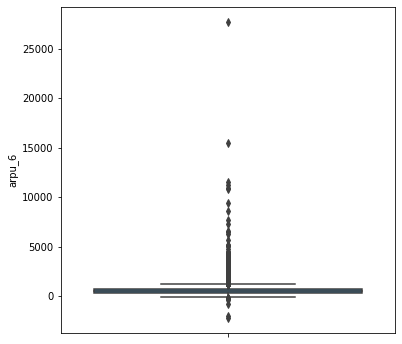

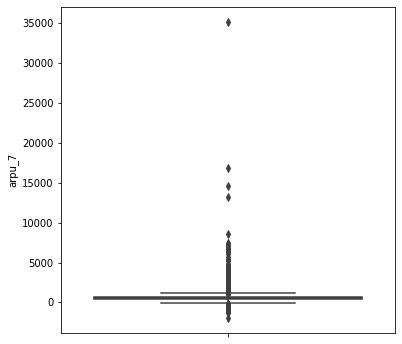

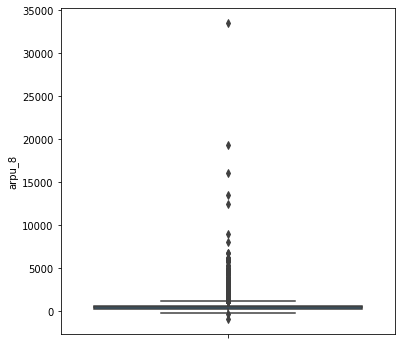

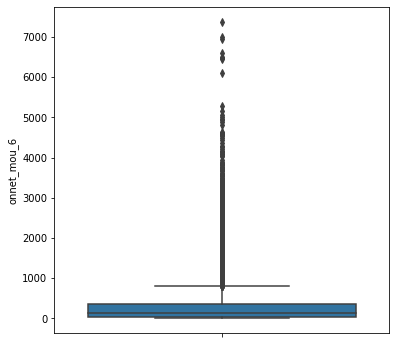

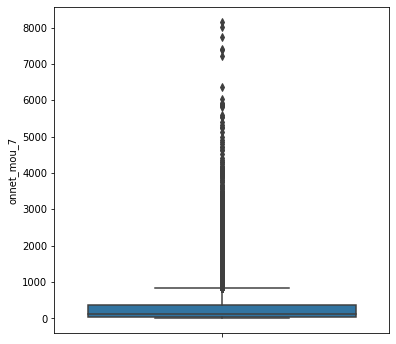

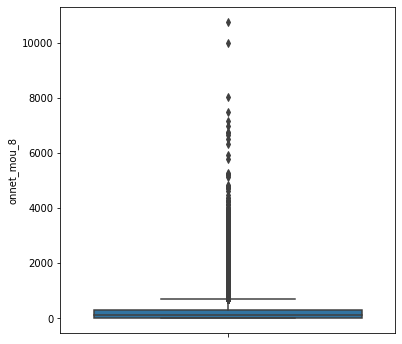

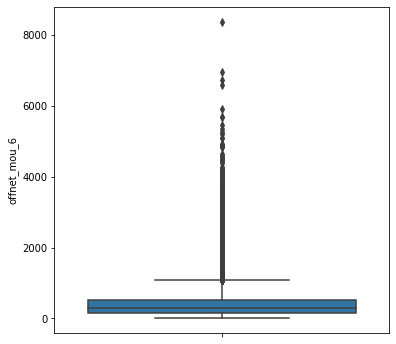

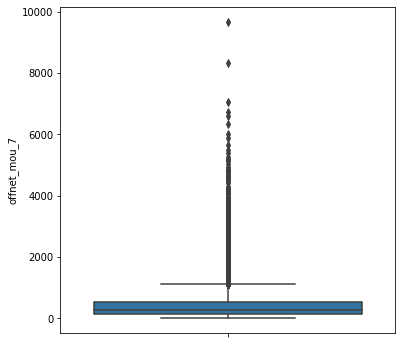

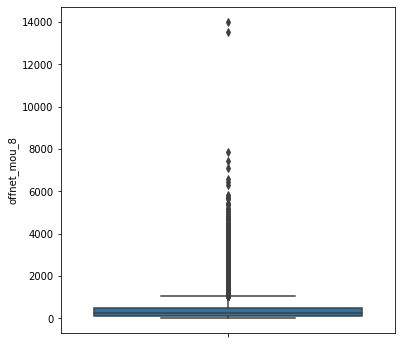

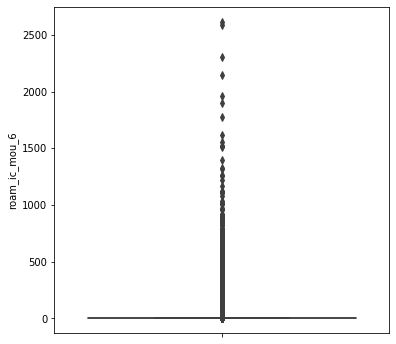

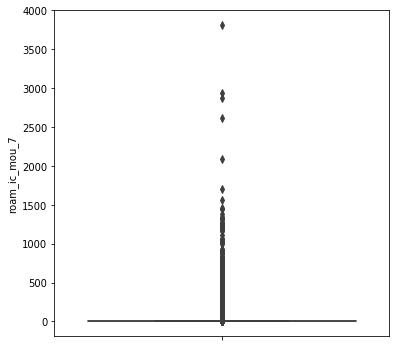

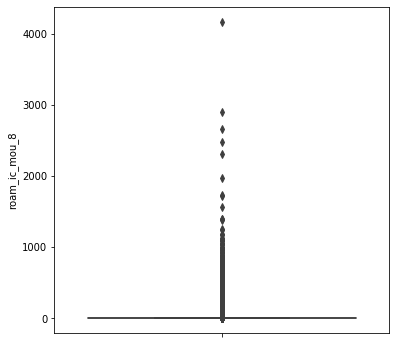

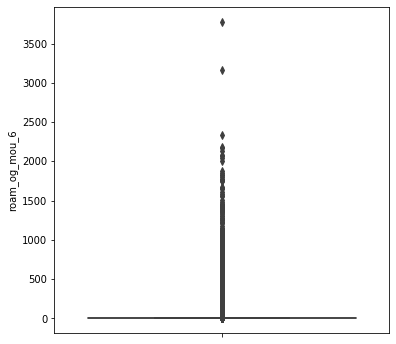

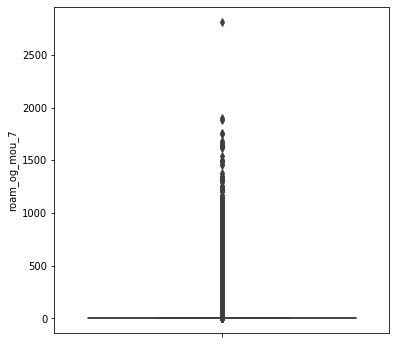

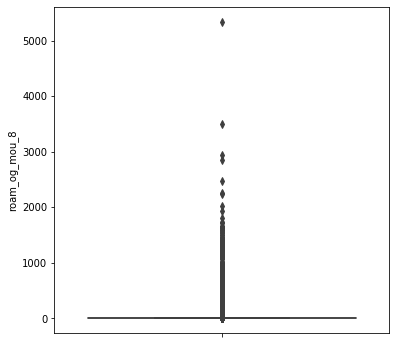

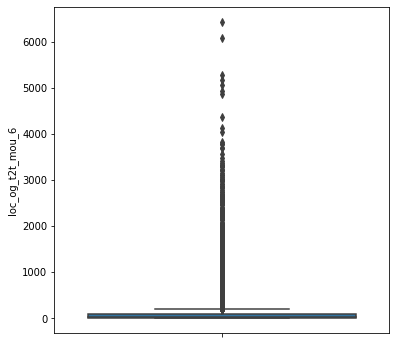

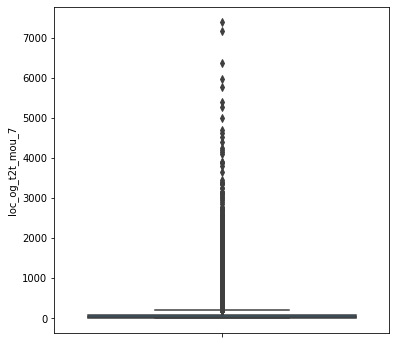

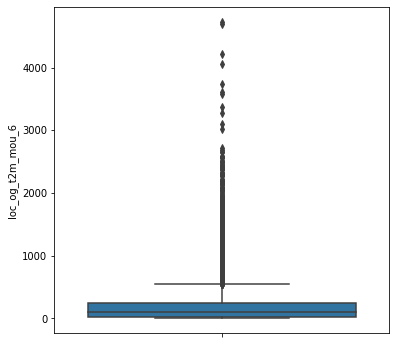

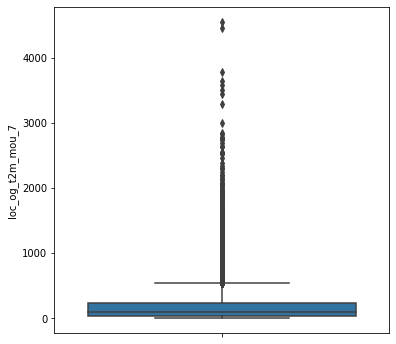

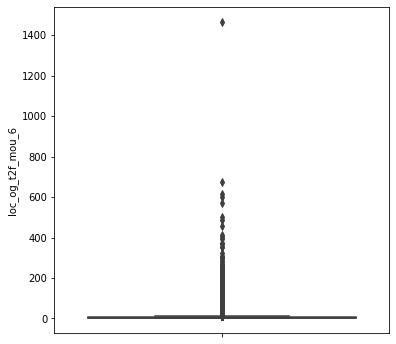

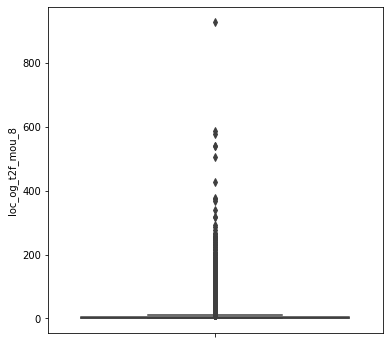

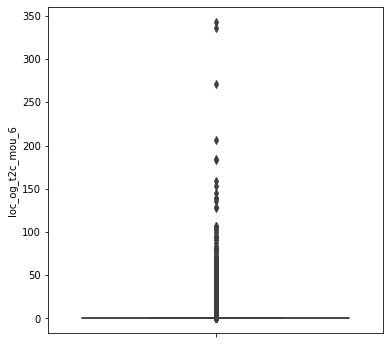

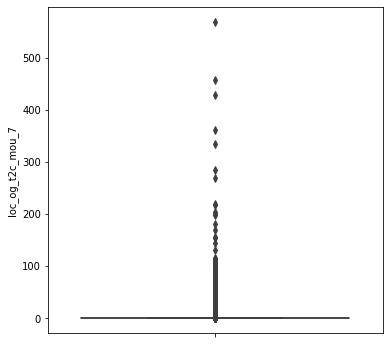

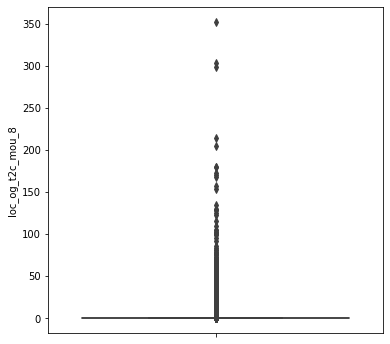

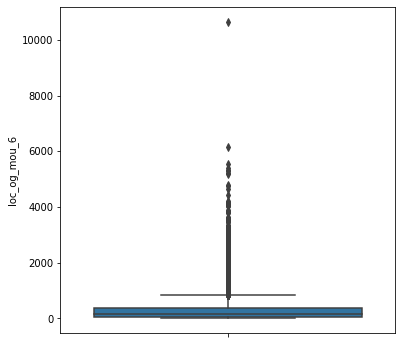

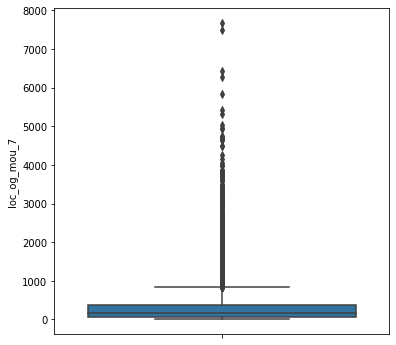

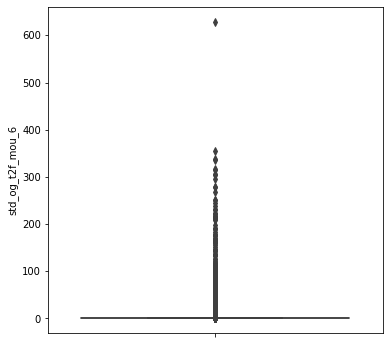

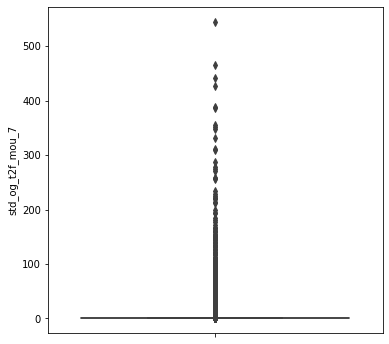

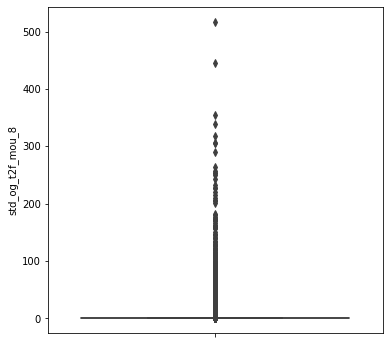

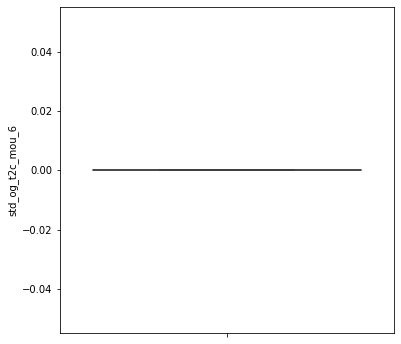

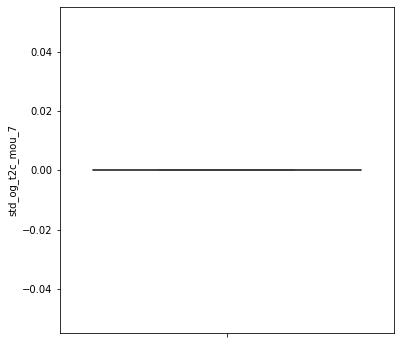

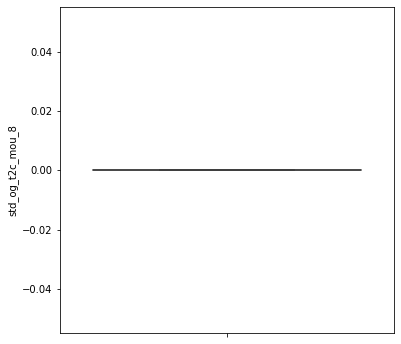

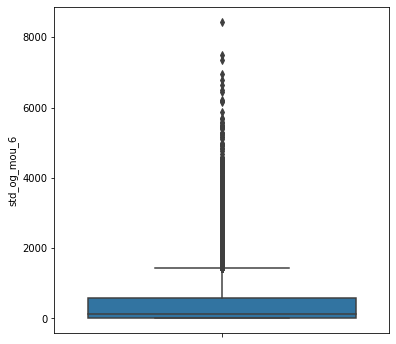

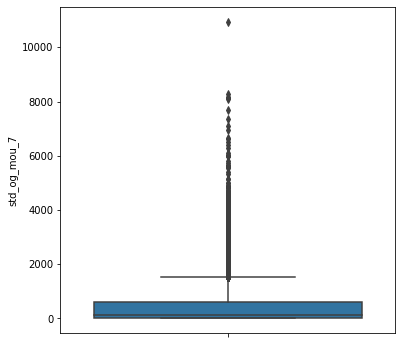

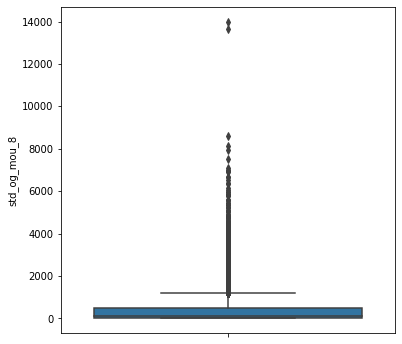

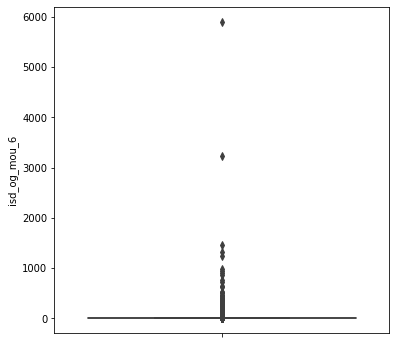

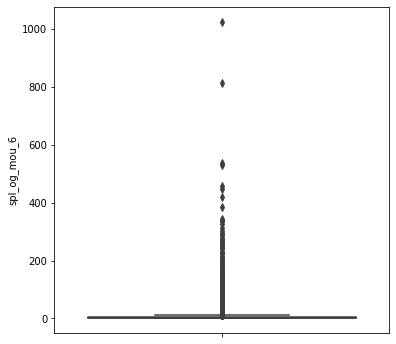

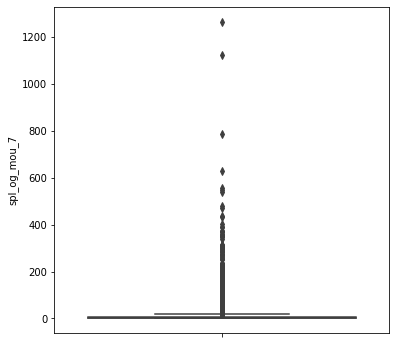

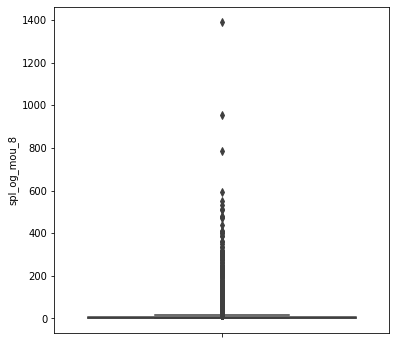

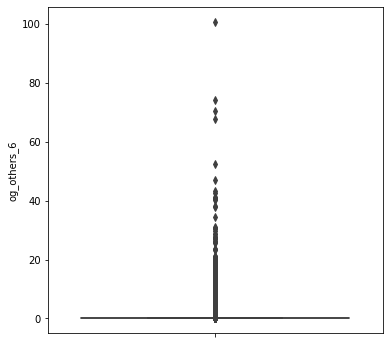

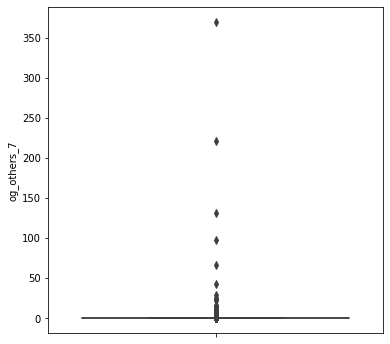

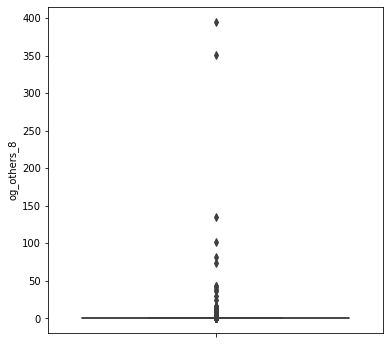

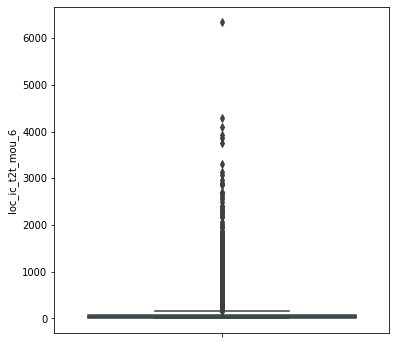

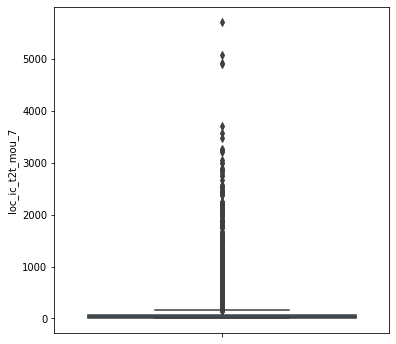

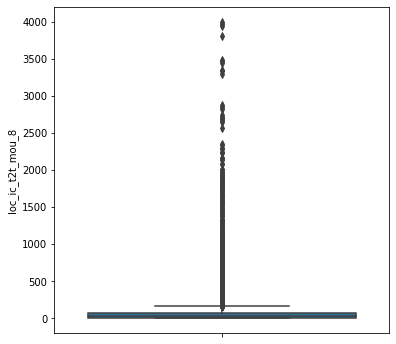

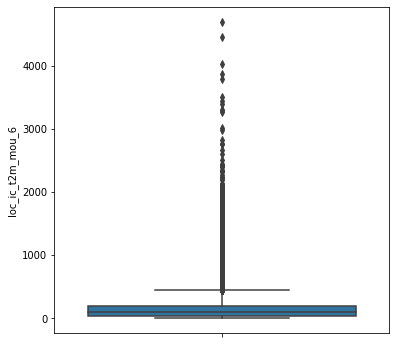

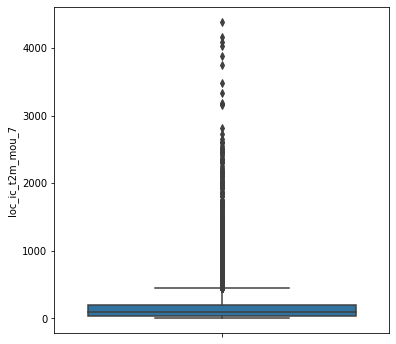

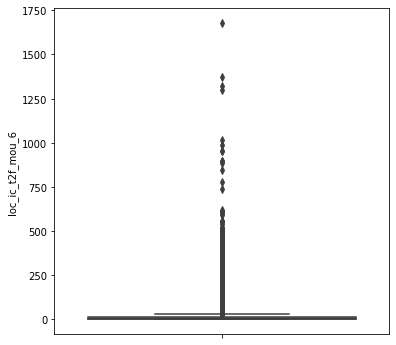

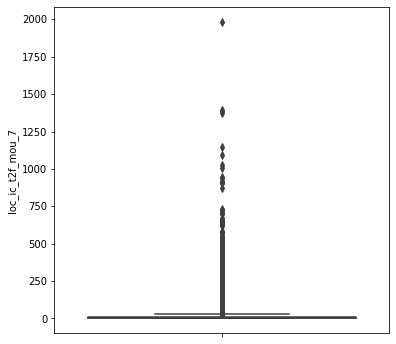

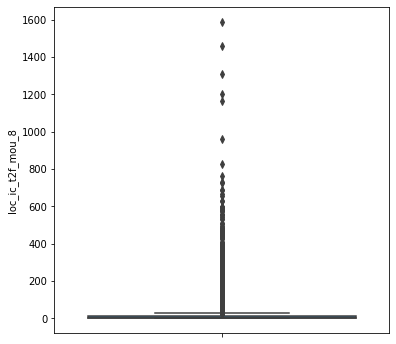

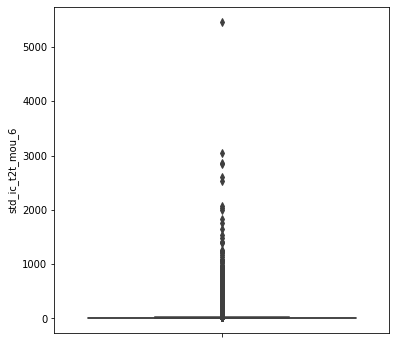

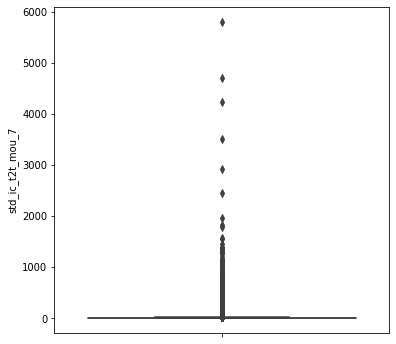

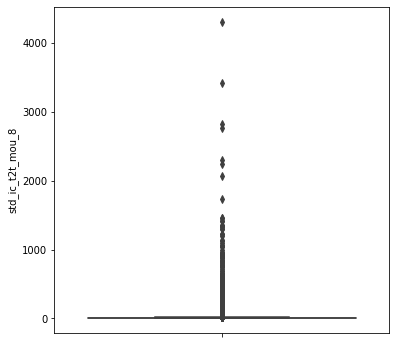

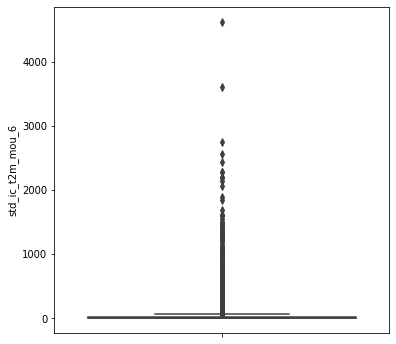

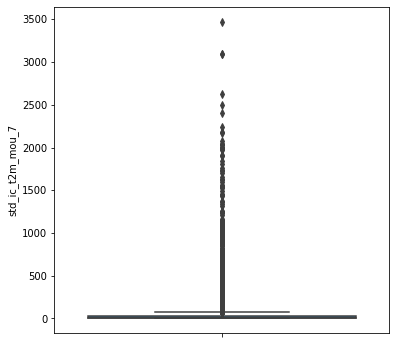

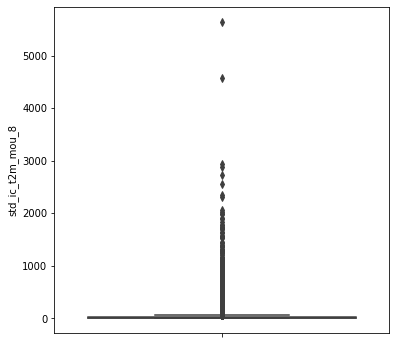

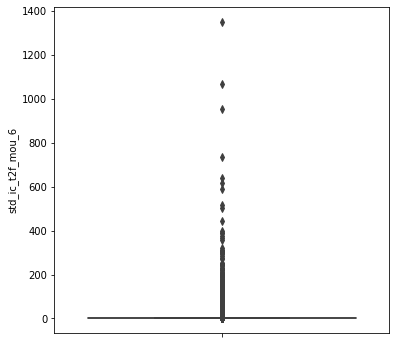

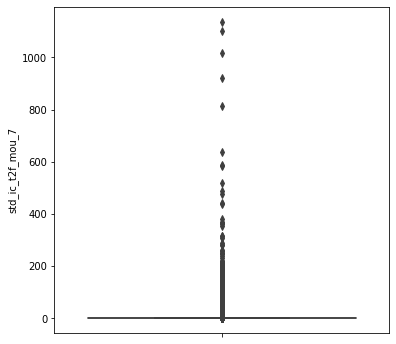

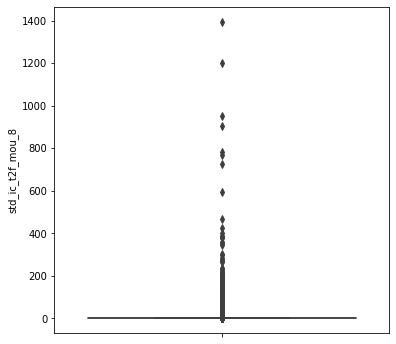

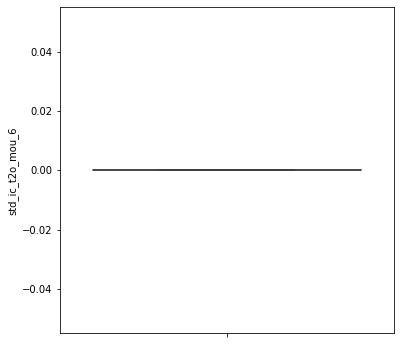

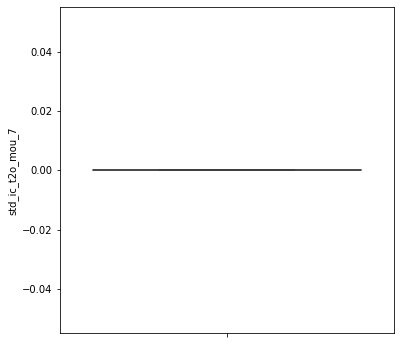

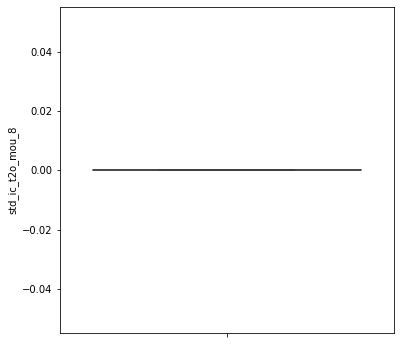

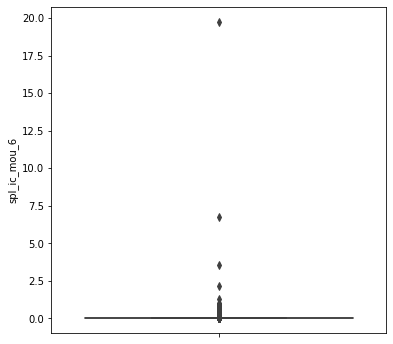

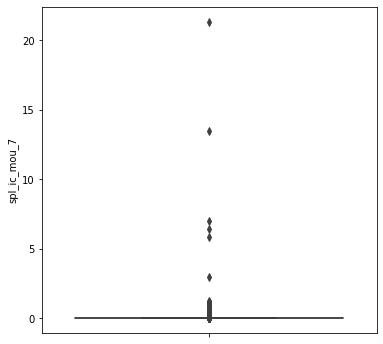

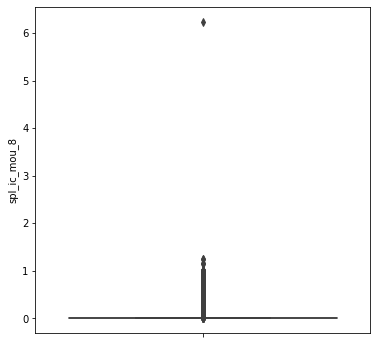

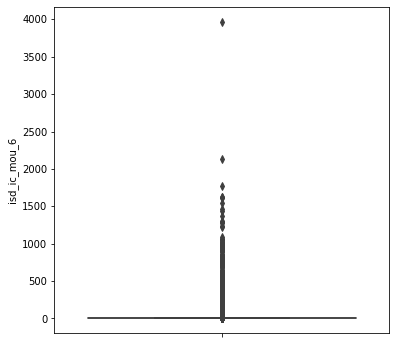

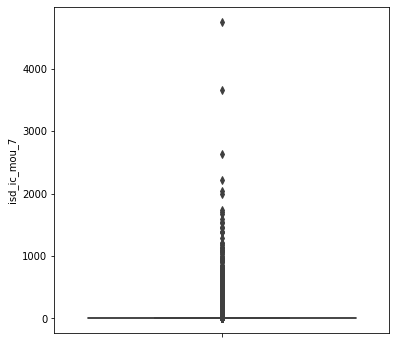

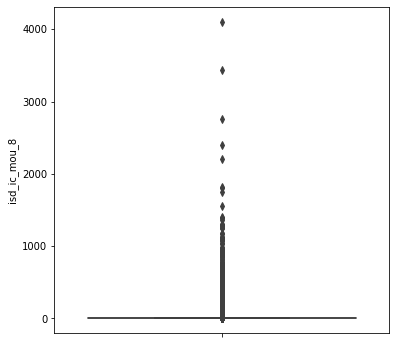

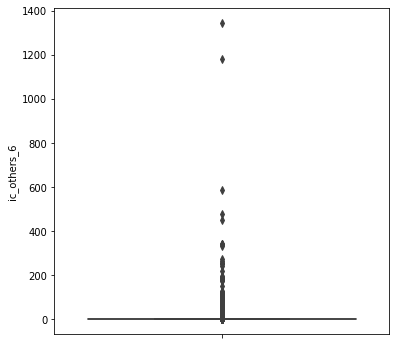

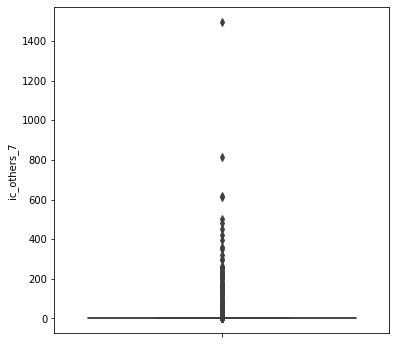

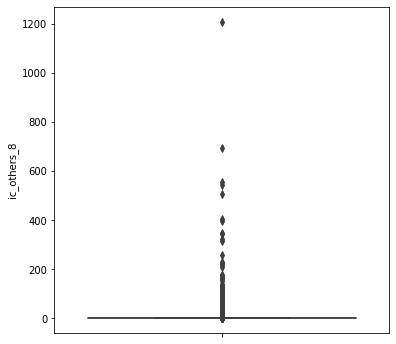

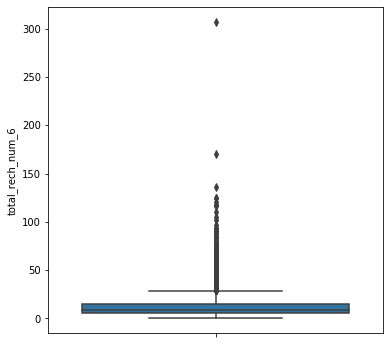

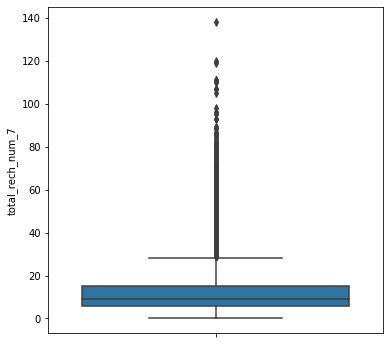

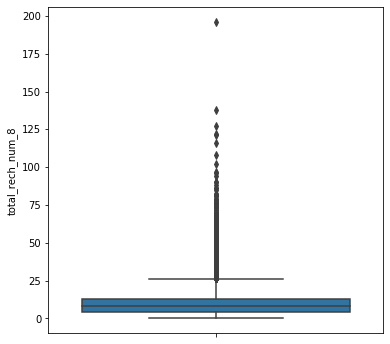

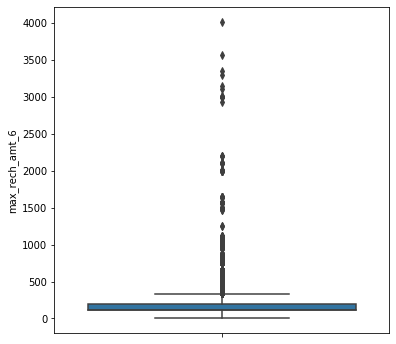

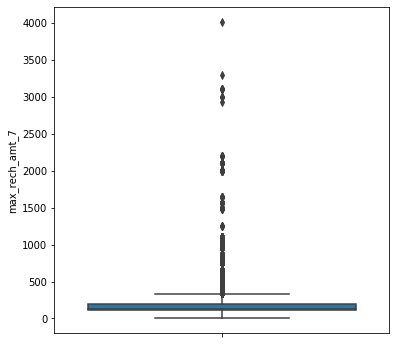

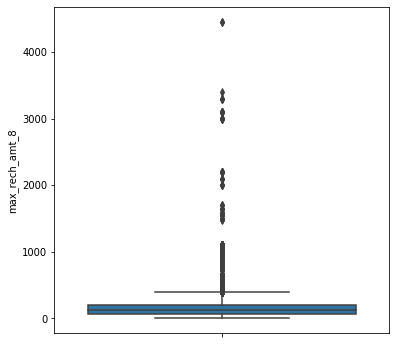

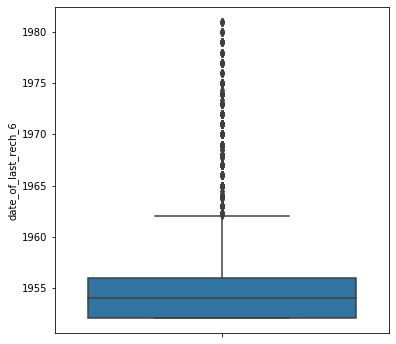

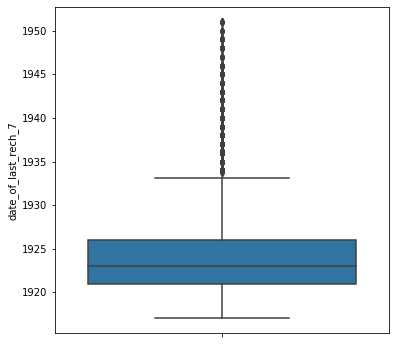

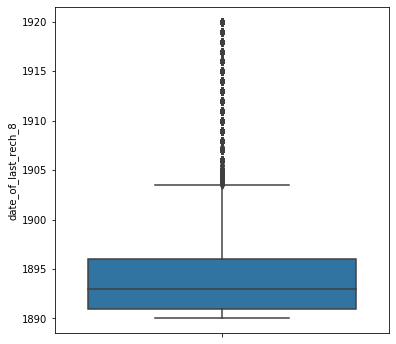

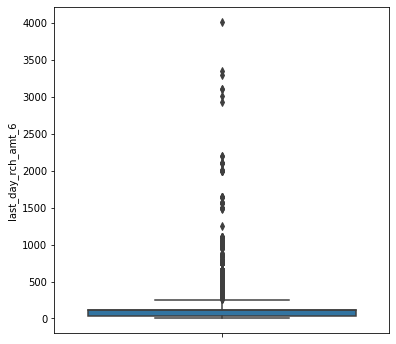

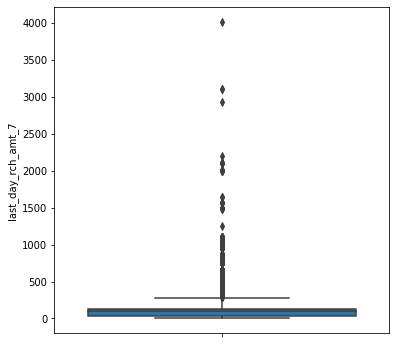

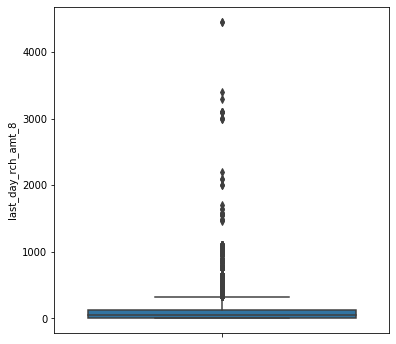

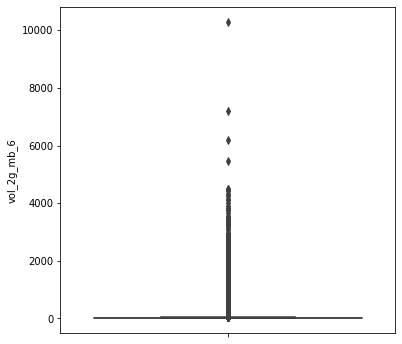

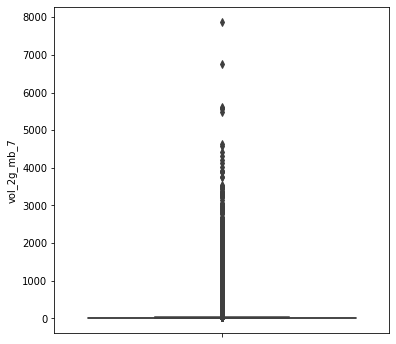

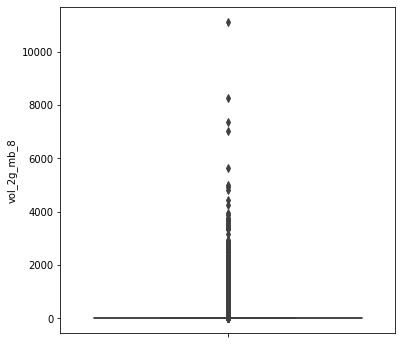

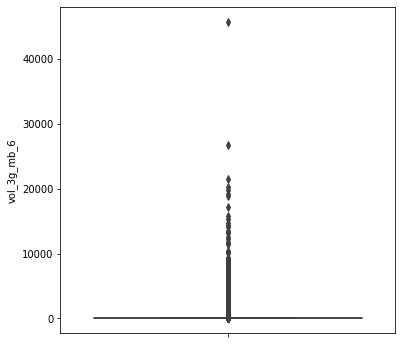

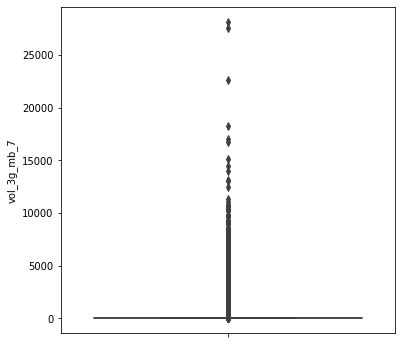

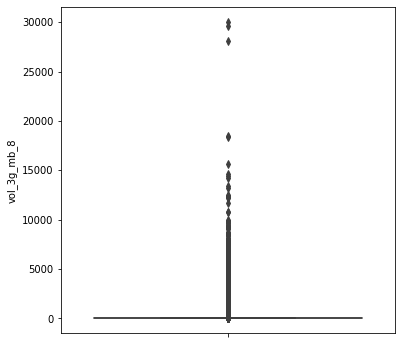

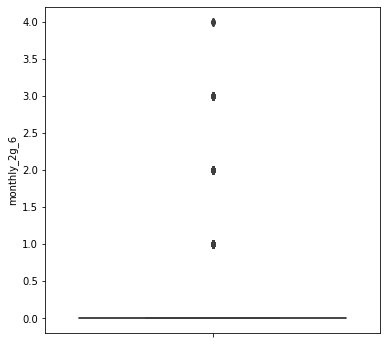

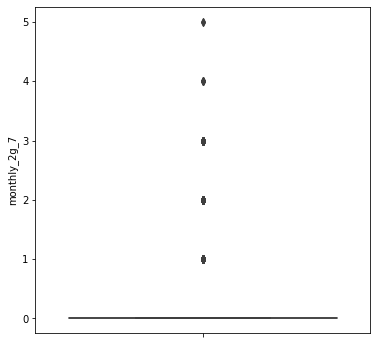

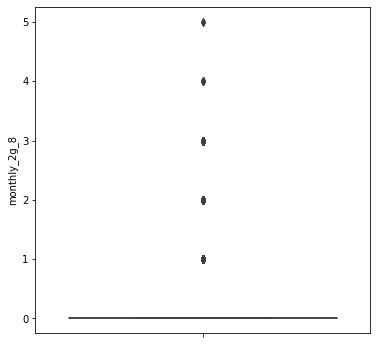

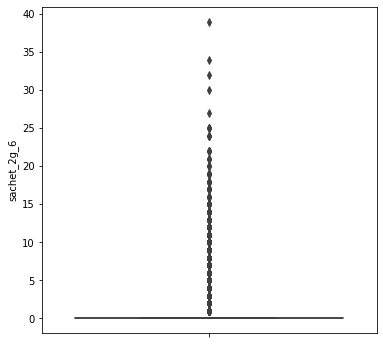

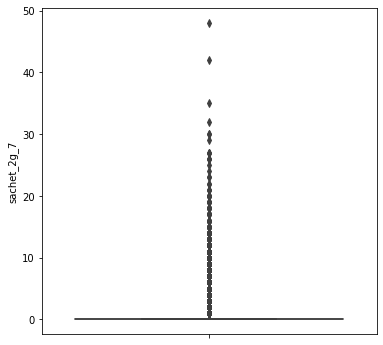

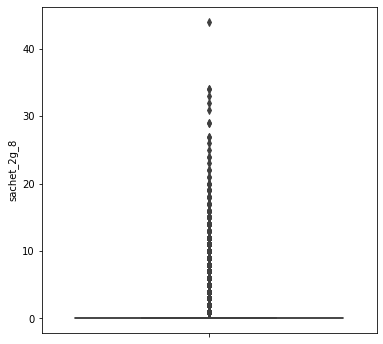

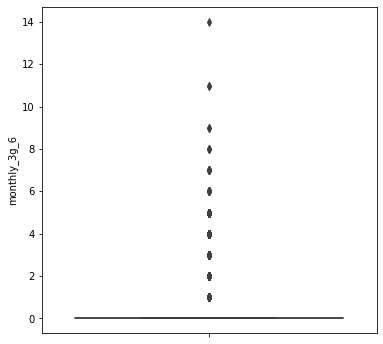

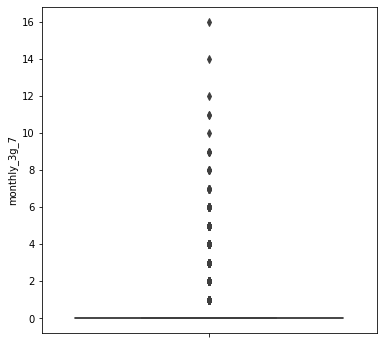

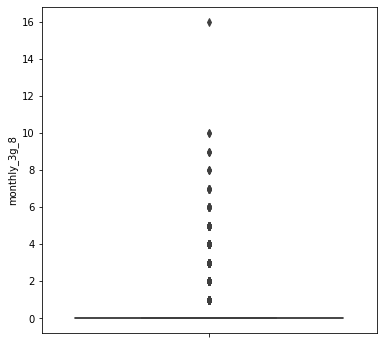

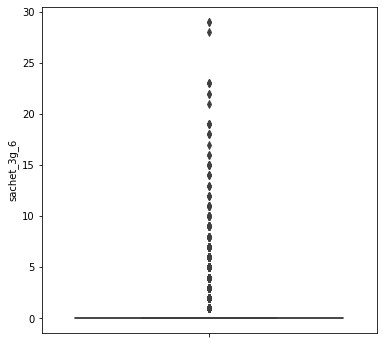

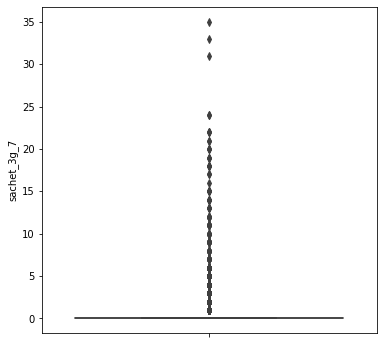

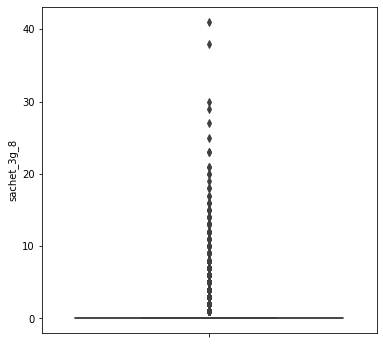

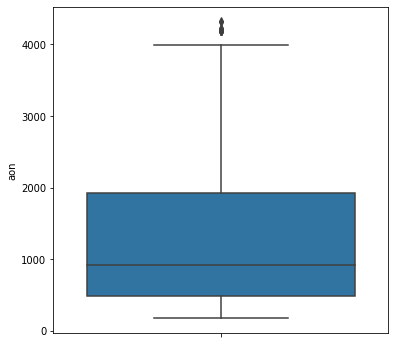

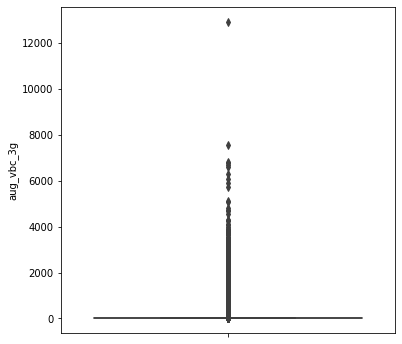

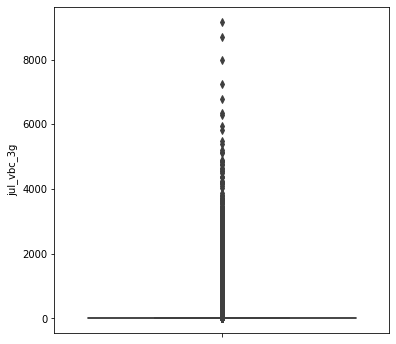

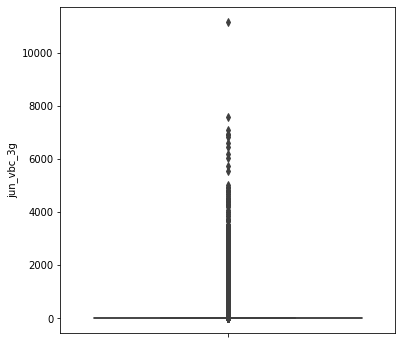

In [ ]:
df2_cols = [col for col in df2.columns if col not in ['mobile_number','churn']]
for feat in df2_cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(y=feat, data = df2)

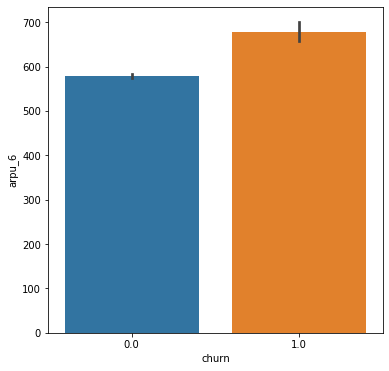

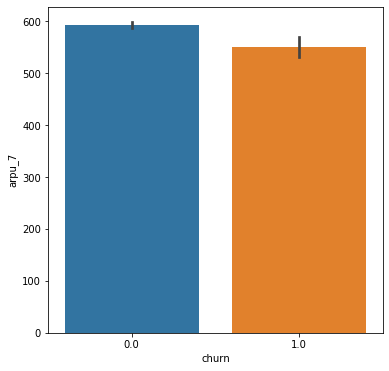

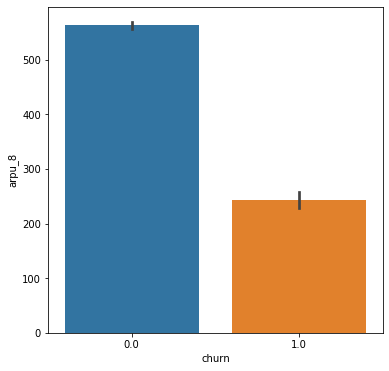

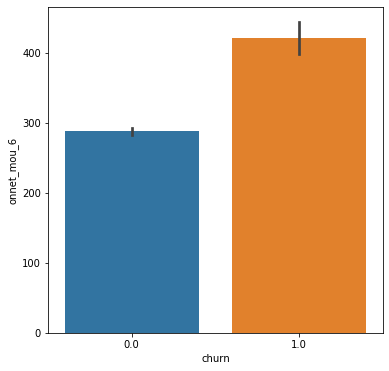

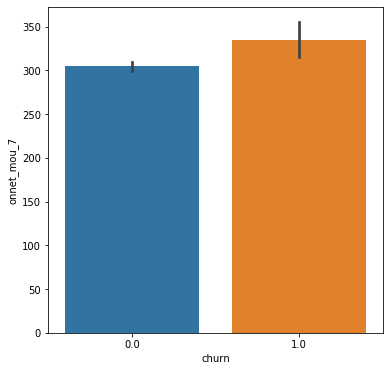

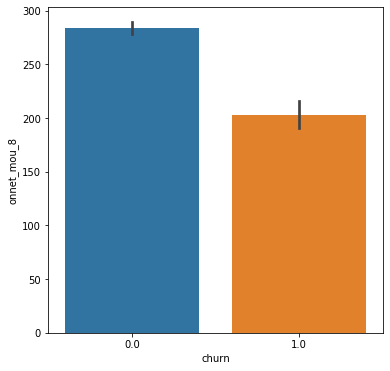

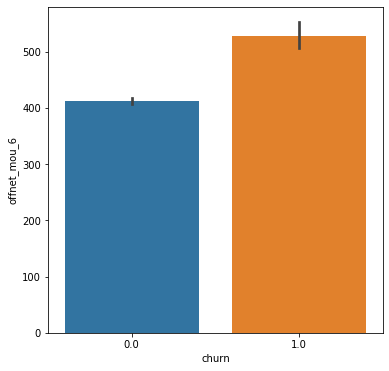

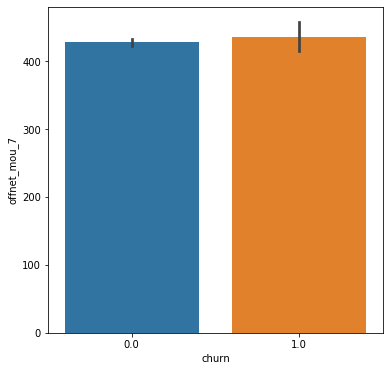

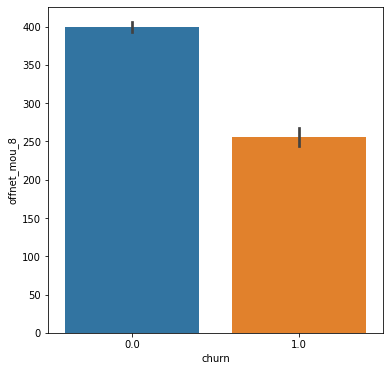

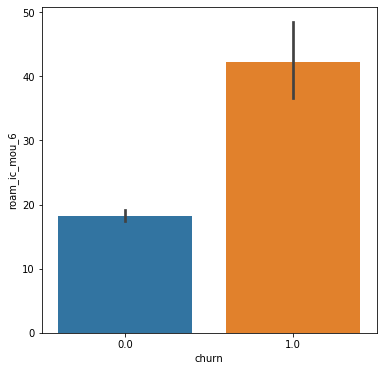

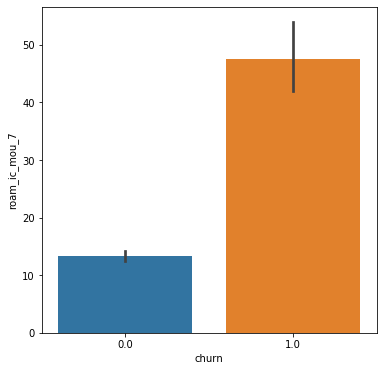

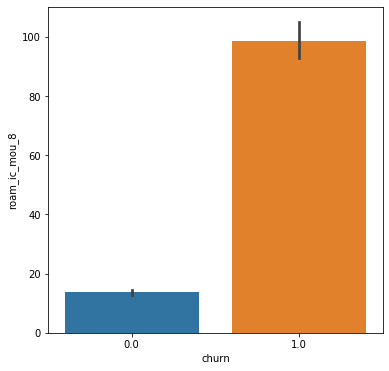

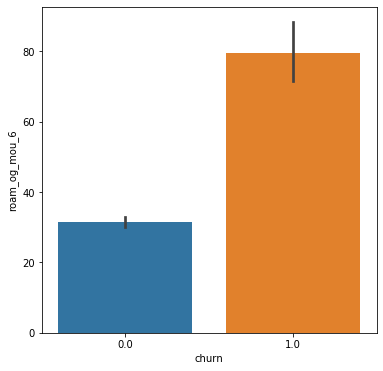

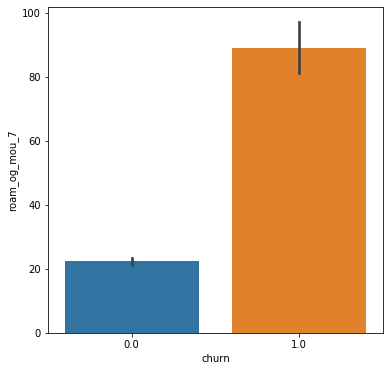

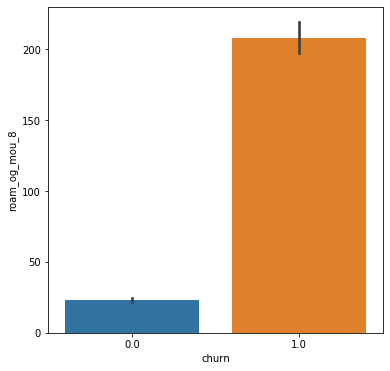

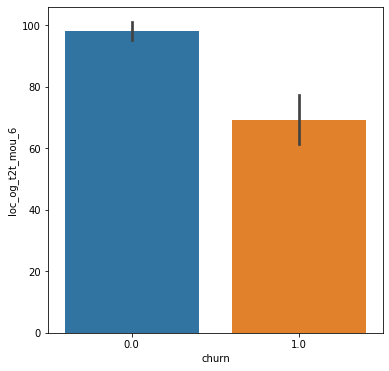

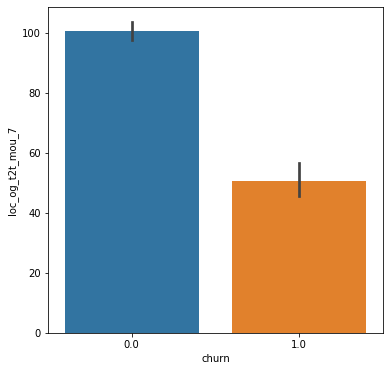

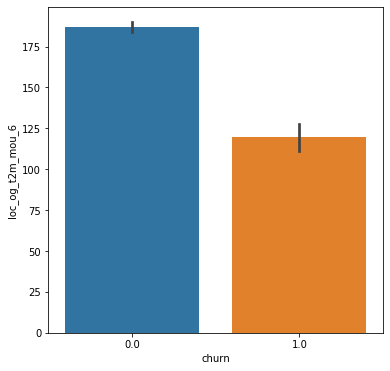

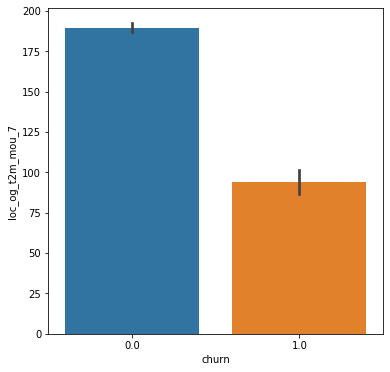

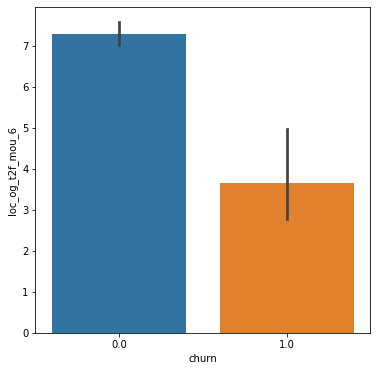

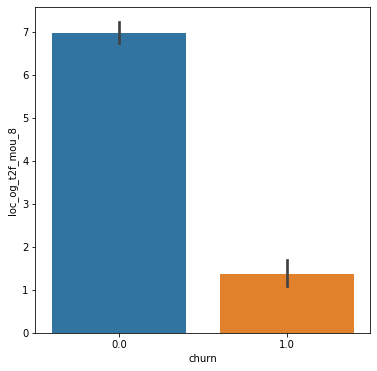

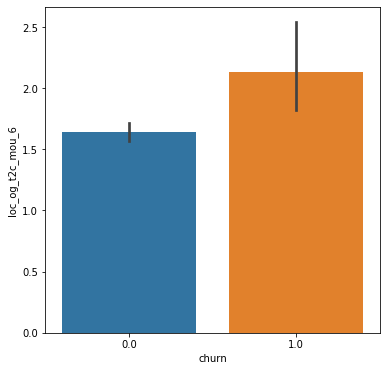

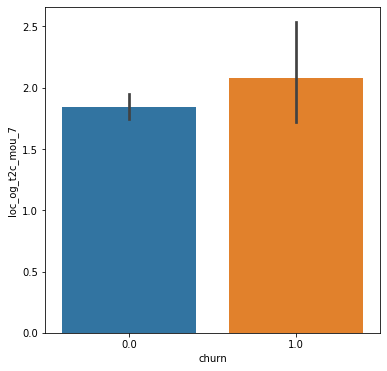

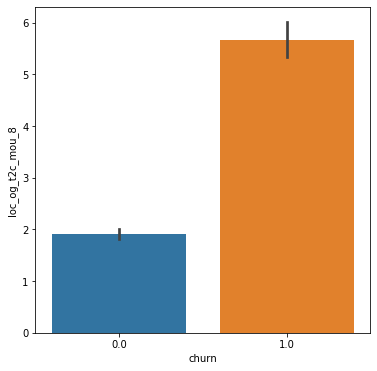

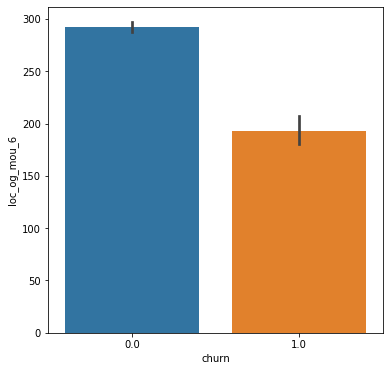

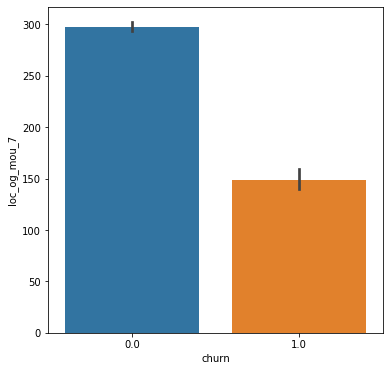

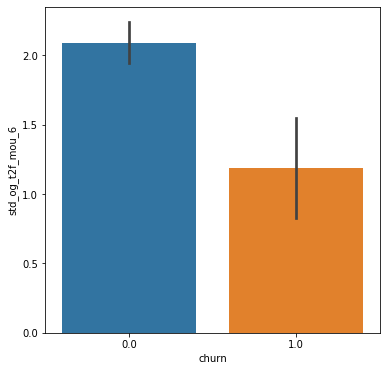

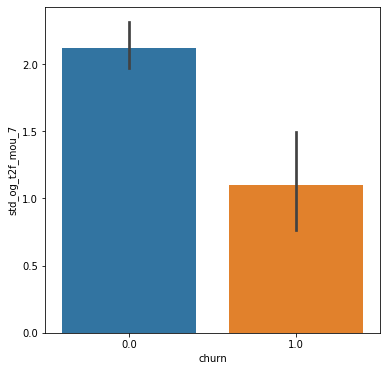

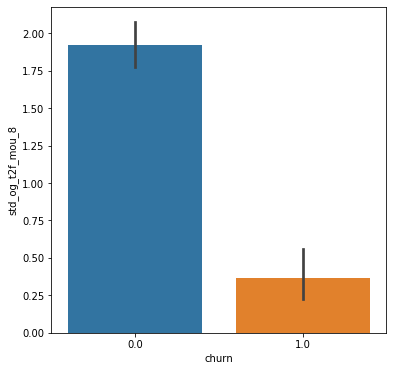

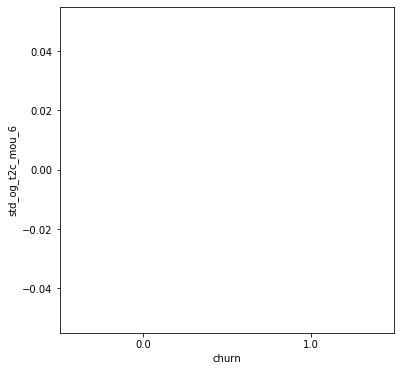

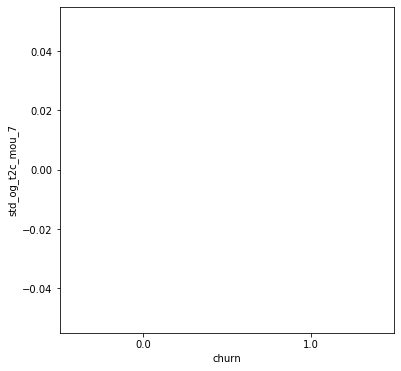

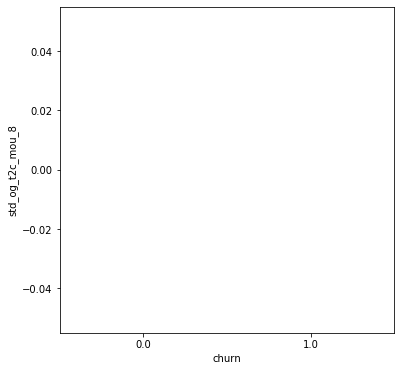

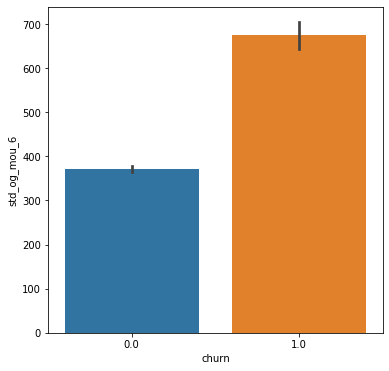

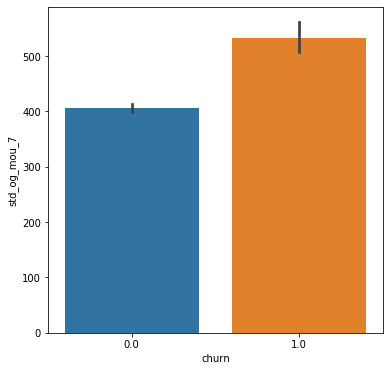

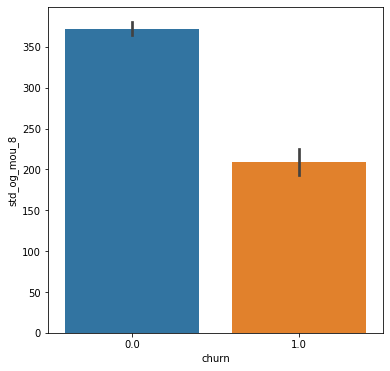

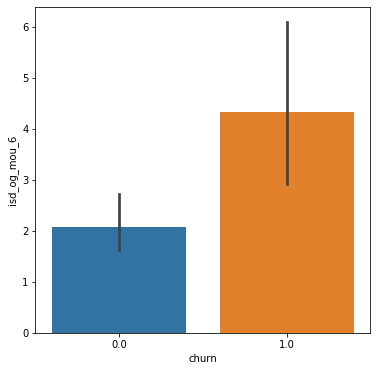

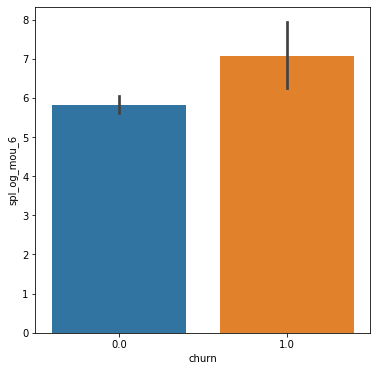

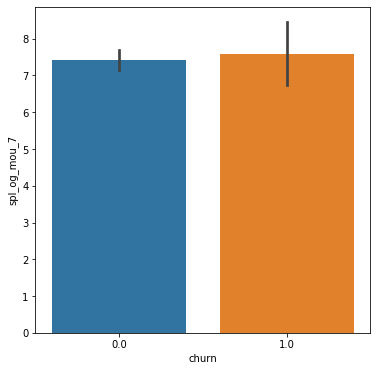

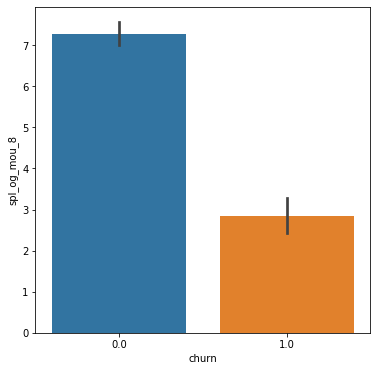

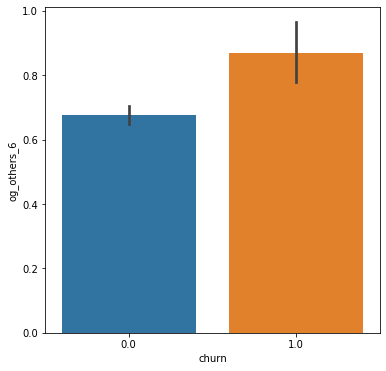

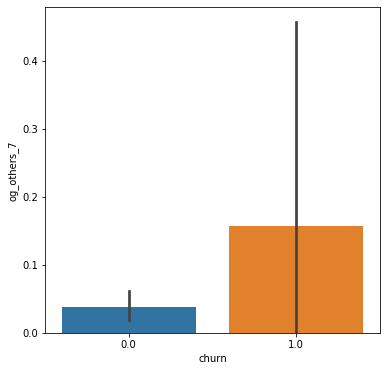

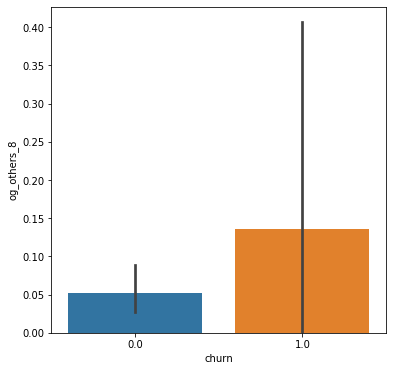

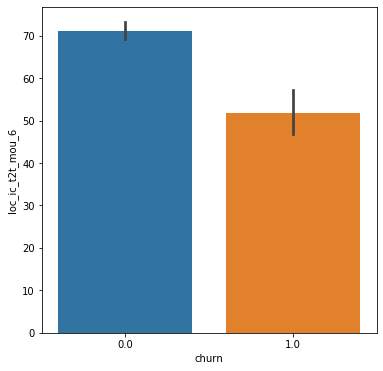

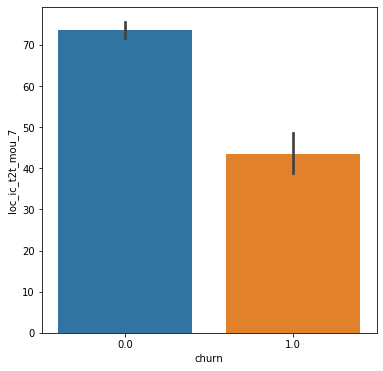

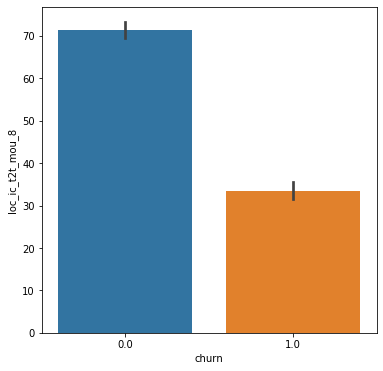

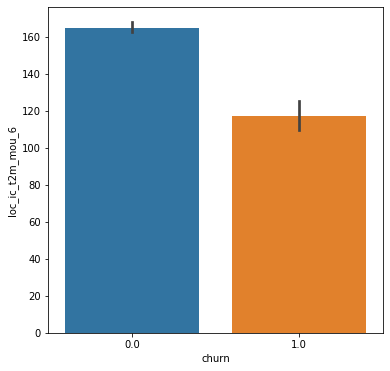

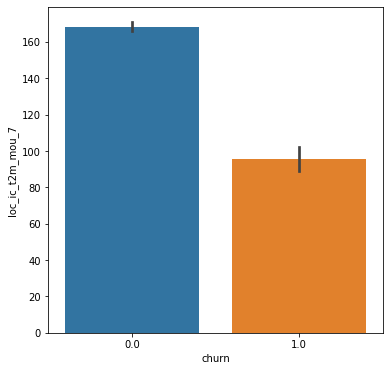

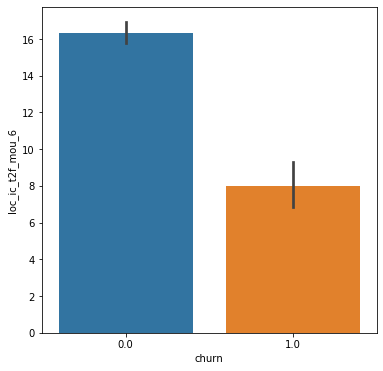

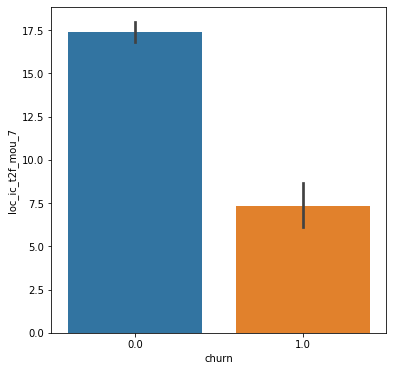

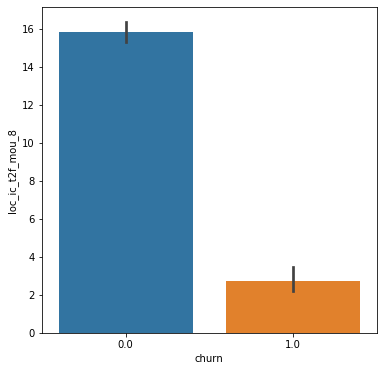

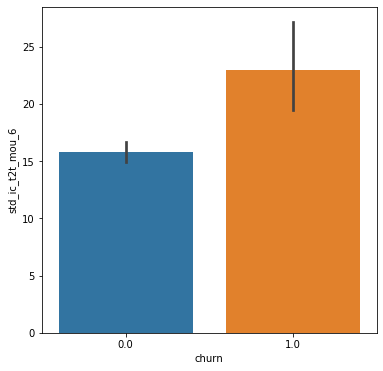

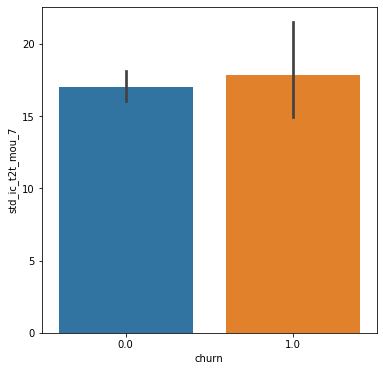

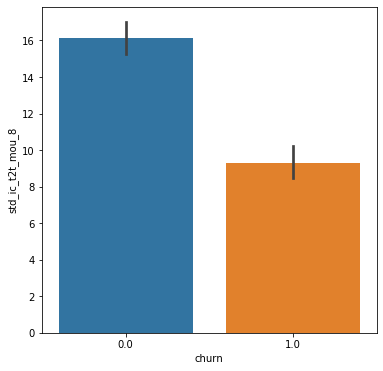

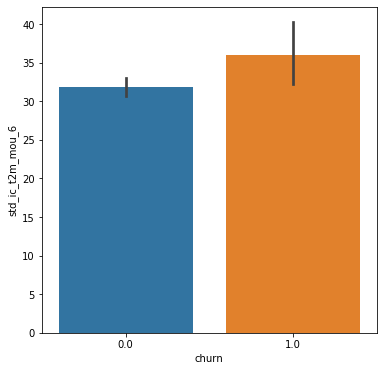

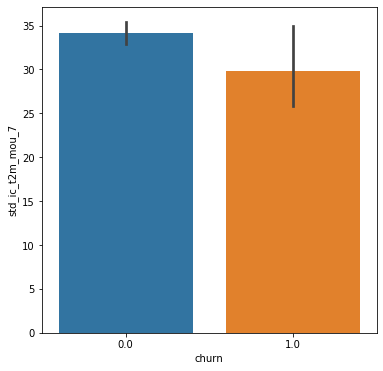

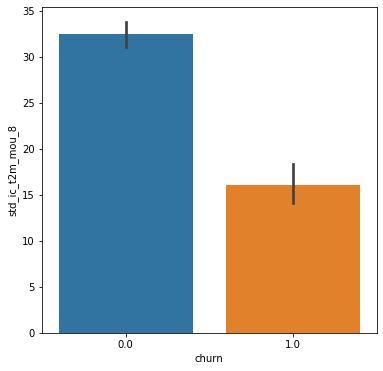

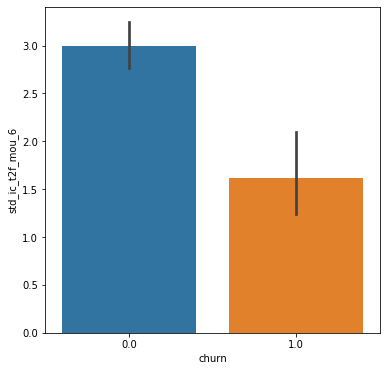

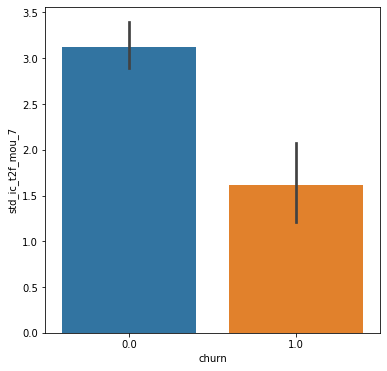

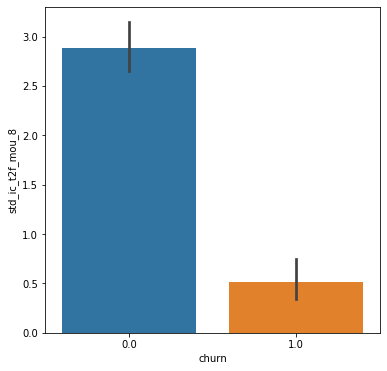

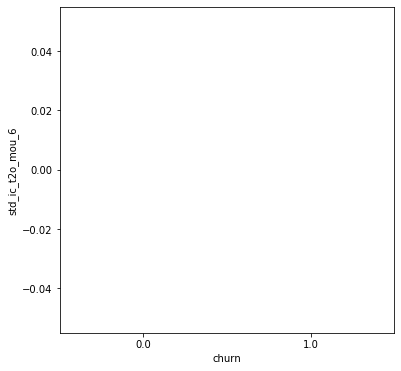

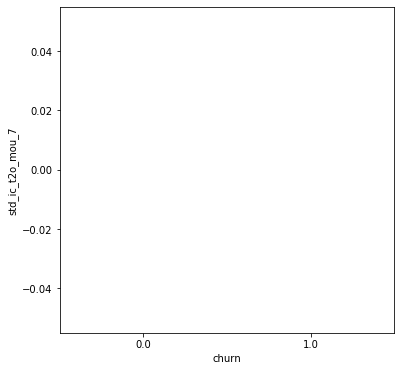

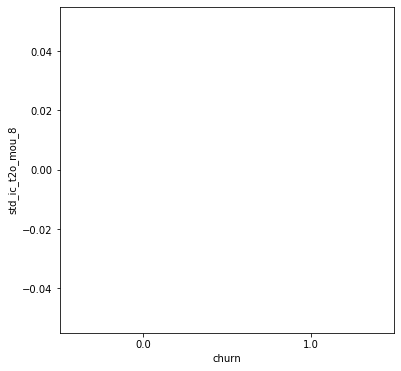

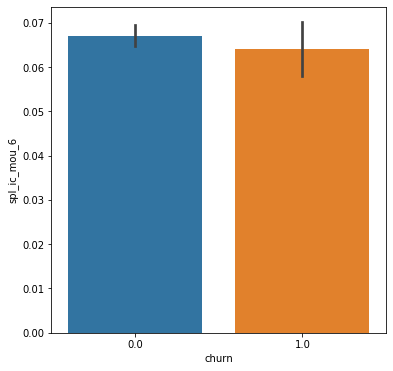

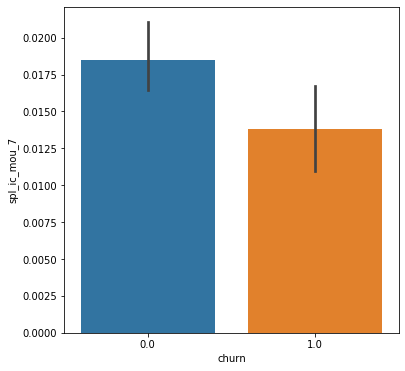

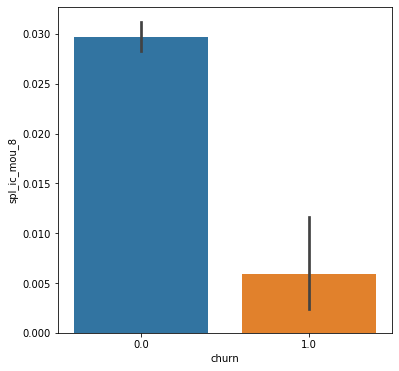

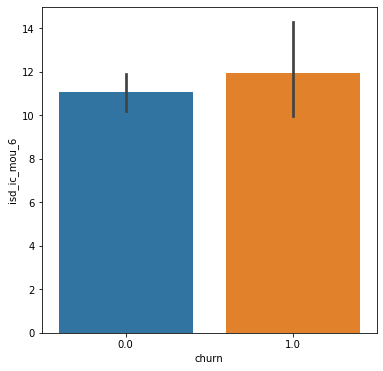

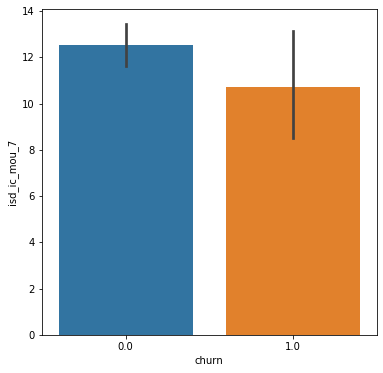

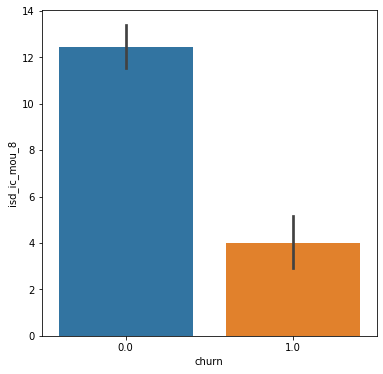

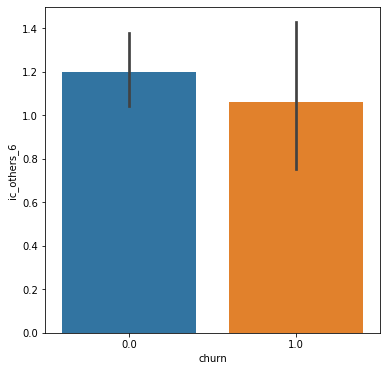

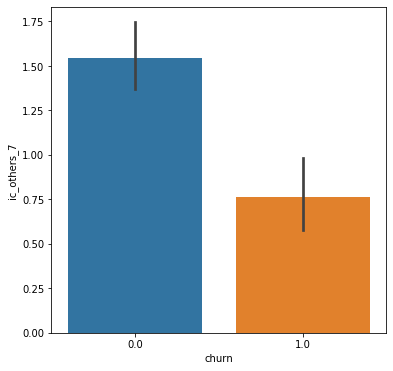

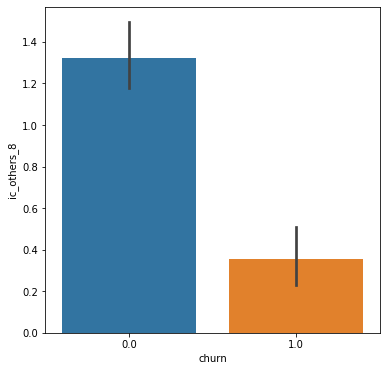

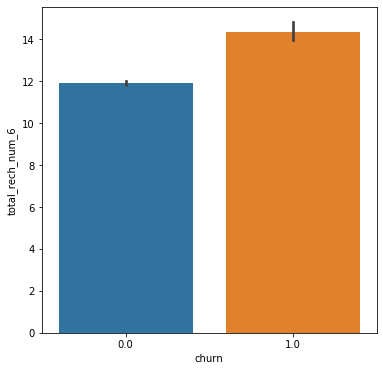

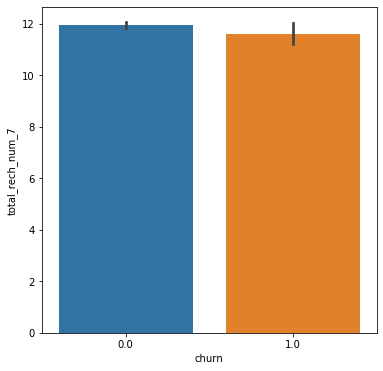

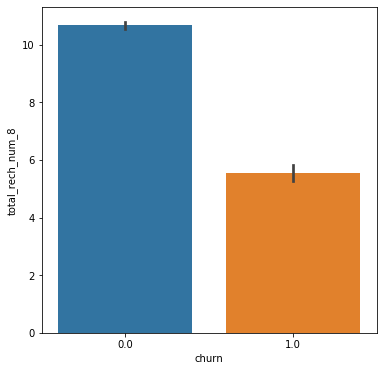

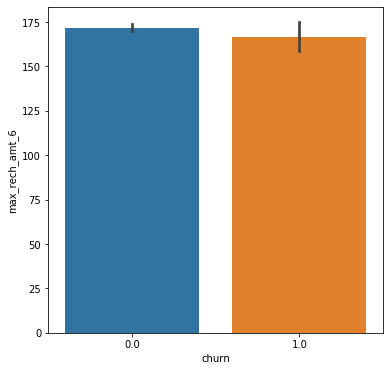

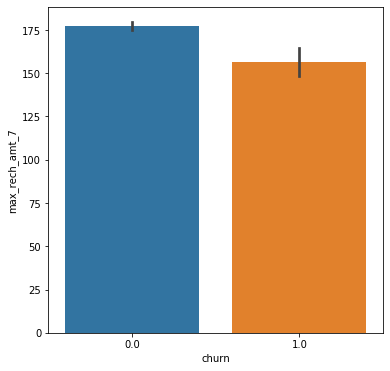

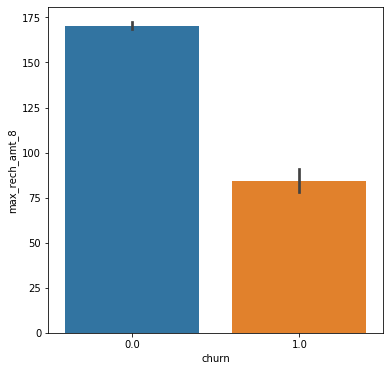

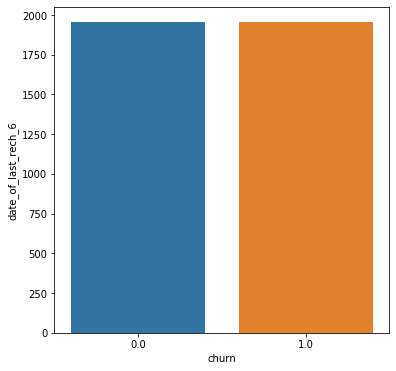

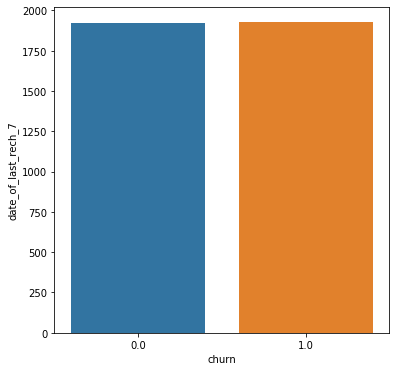

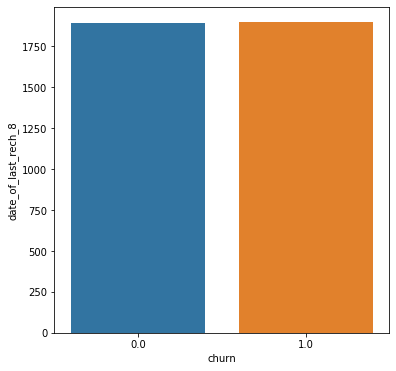

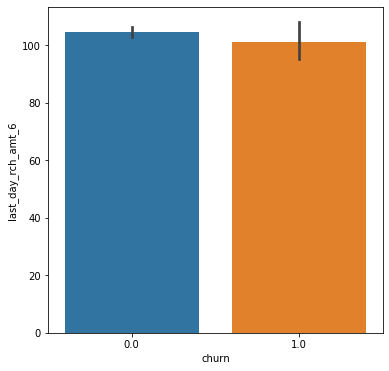

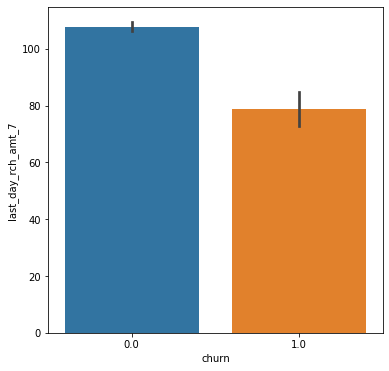

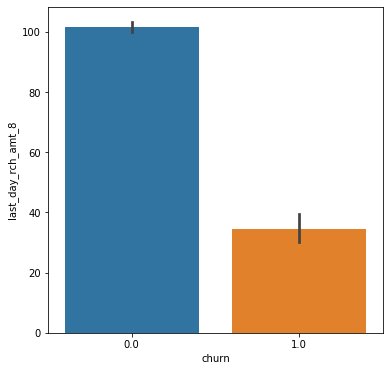

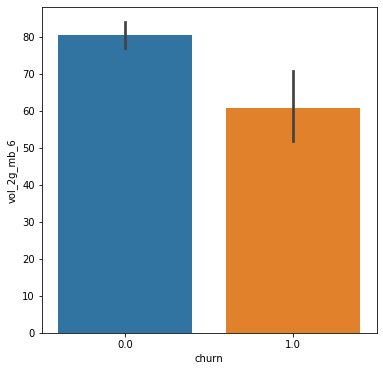

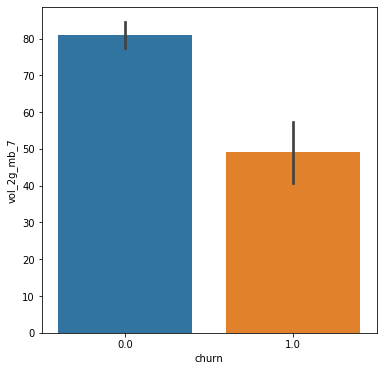

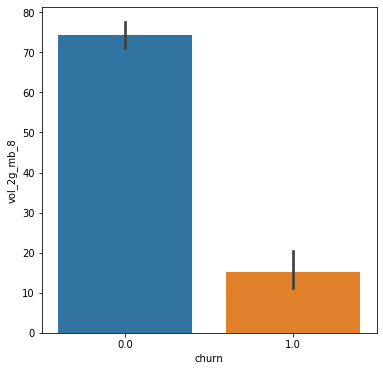

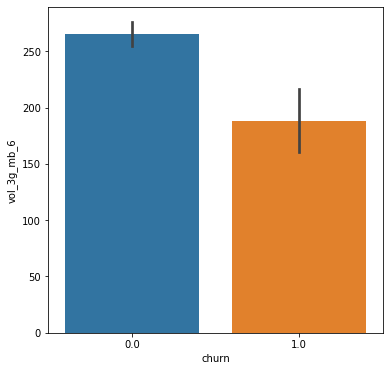

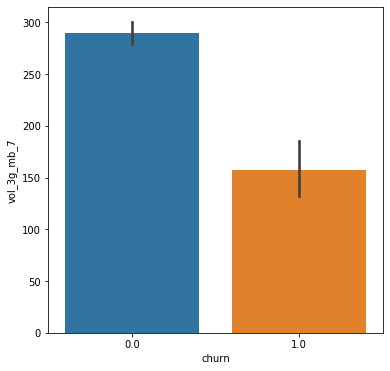

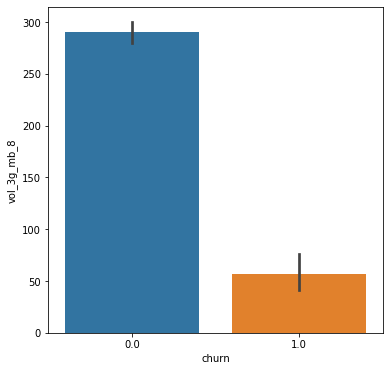

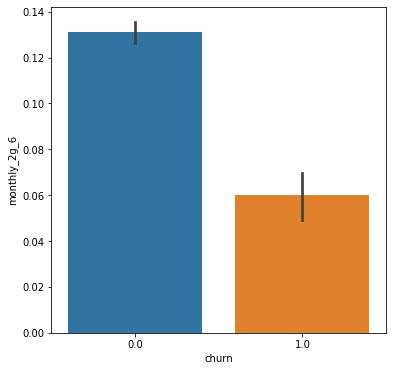

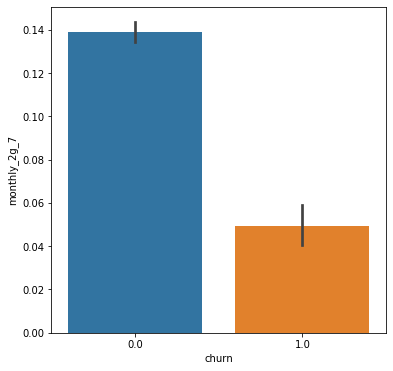

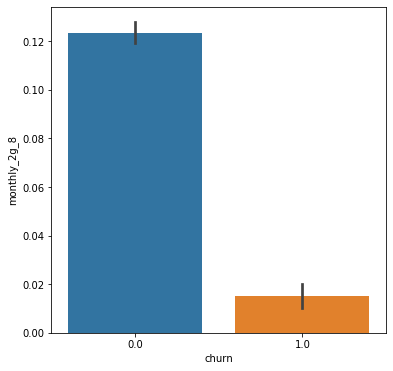

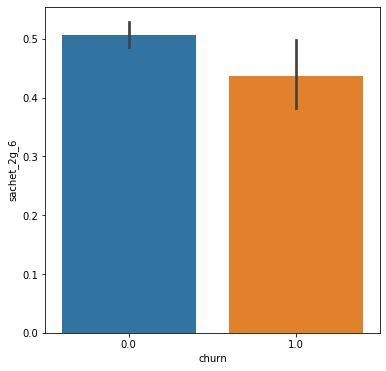

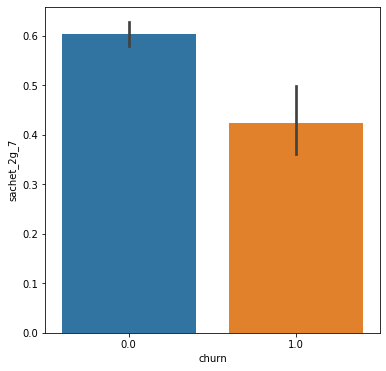

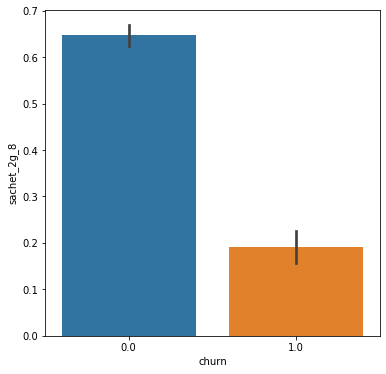

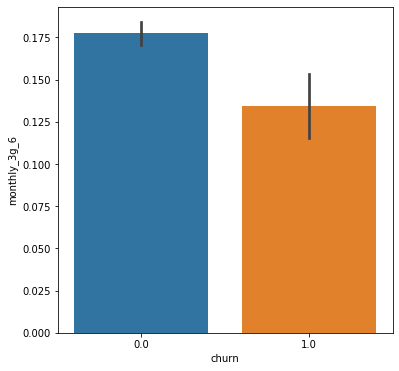

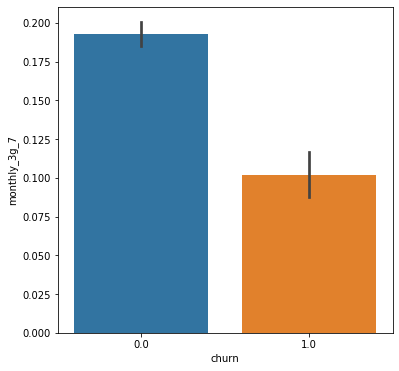

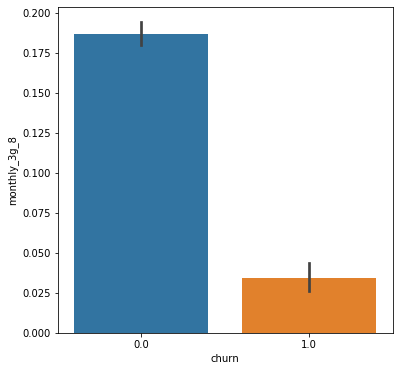

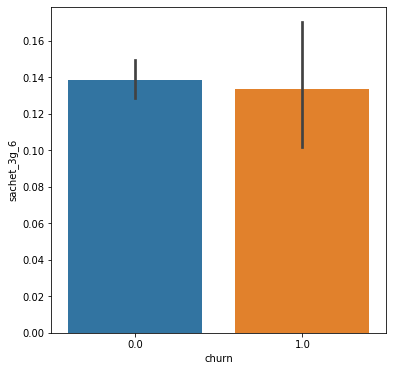

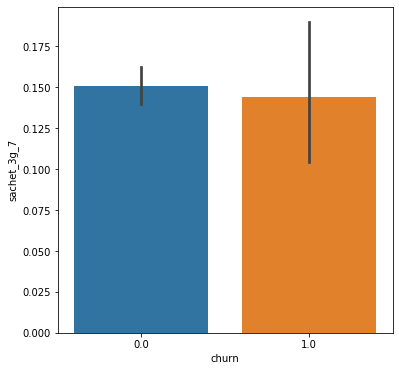

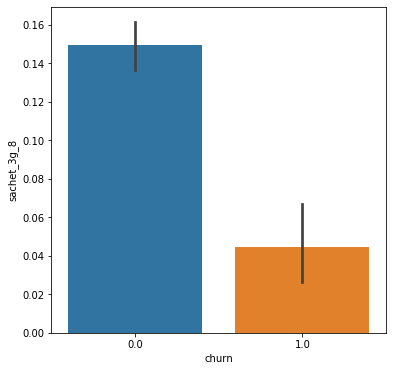

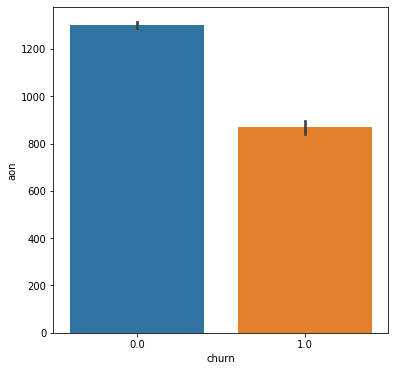

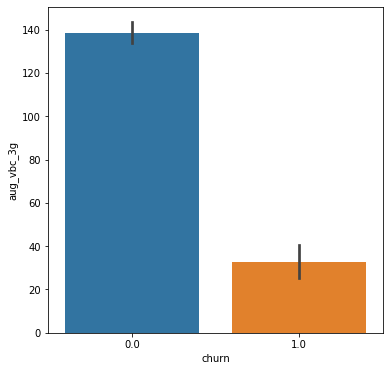

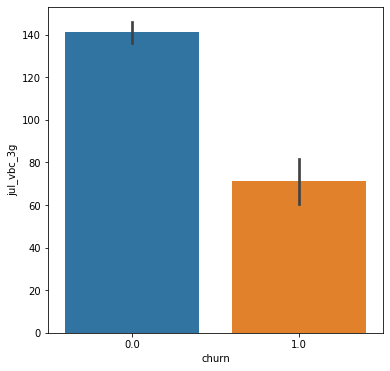

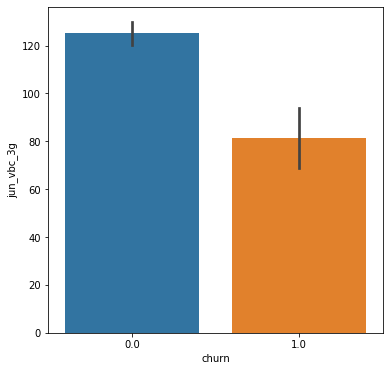

In [ ]:
for feat in df2_cols:
    plt.figure(figsize=(6,6))
    sns.barplot(x='churn', y=feat, data = df2)
    plt.show()

In [ ]:
# Dropping few variables which has all 0 values

df2.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1, inplace=True)
df2.shape

(30011, 101)

In [ ]:
# Splitting the data into train and test set

from sklearn.model_selection import train_test_split

np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state=100)

In [ ]:
# Dividing the train and test data

y_train = df2_train.pop('churn')
X_train = df2_train

y_test = df2_test.pop('churn')
X_test = df2_test

In [ ]:
# Loading the library for scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the train data
df2_train = scaler.fit_transform(X_train)

In [ ]:
# Scaling the test data

df2_test = scaler.transform(X_test)

### Applying Smote

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_tr,y_tr = sm.fit_sample(X_train,y_train.ravel())
print(X_tr.shape)
print(y_tr.shape)

(38368, 100)
(38368,)


### Performing PCA

In [ ]:
# Importing the PCA library

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
# Performing the PCA
X_tr_pca = X_train.drop(['mobile_number'], axis=1)
pca.fit(X_tr_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [ ]:
# List of PCA components
pca.components_

array([[ 3.80105707e-02,  4.36656696e-02,  4.63206191e-02, ...,
         1.76494856e-01,  1.93794770e-01,  1.78376661e-01],
       [ 1.46509627e-01,  1.90306906e-01,  1.85280144e-01, ...,
         3.72367183e-02,  3.79046092e-02,  3.62018744e-02],
       [ 1.32992584e-01,  1.56841179e-01,  1.89744515e-01, ...,
         1.72301986e-02,  1.16904212e-02,  5.90984036e-03],
       ...,
       [ 5.32969245e-05,  1.21356197e-04, -1.73695089e-04, ...,
         2.85482510e-05, -3.90876529e-05, -6.66772737e-06],
       [ 6.21079776e-06, -4.73391314e-06, -8.97159628e-07, ...,
        -5.46096831e-06,  2.93186136e-06, -2.16279811e-06],
       [ 1.03070638e-06,  1.18774844e-06, -9.30705125e-06, ...,
        -2.47406458e-06, -2.59890717e-07,  1.06455242e-06]])

In [ ]:
# Variance Ratio
pca.explained_variance_ratio_

array([2.56772540e-01, 1.83608019e-01, 1.19656128e-01, 7.42420355e-02,
       6.36088755e-02, 4.07507916e-02, 3.33229825e-02, 2.97328521e-02,
       2.61447873e-02, 2.22249911e-02, 1.93731805e-02, 1.73500865e-02,
       1.17335312e-02, 9.94998995e-03, 8.20337183e-03, 7.60611128e-03,
       7.15247561e-03, 5.88347356e-03, 5.37108830e-03, 5.21779988e-03,
       5.01144282e-03, 4.85205918e-03, 4.25271878e-03, 3.90870421e-03,
       3.47485734e-03, 3.24024107e-03, 2.84913300e-03, 2.53793541e-03,
       2.40312071e-03, 2.14096084e-03, 1.70307943e-03, 1.63466264e-03,
       1.46911386e-03, 1.31526184e-03, 1.25677888e-03, 1.07882123e-03,
       9.78289901e-04, 9.43788243e-04, 9.03149471e-04, 8.07979274e-04,
       7.43489497e-04, 6.48218303e-04, 6.30521011e-04, 4.83136304e-04,
       3.81794763e-04, 3.42871912e-04, 2.79431743e-04, 2.68283910e-04,
       2.49286565e-04, 1.80027657e-04, 1.61837406e-04, 1.43227210e-04,
       1.32977678e-04, 1.23221564e-04, 1.09654616e-04, 8.36815808e-05,
      

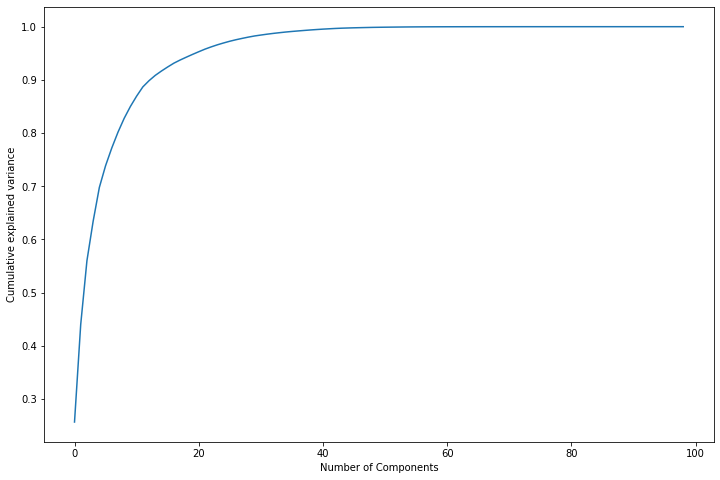

In [ ]:
# Plotting the Scree Plot

fig = plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

Around 90% of the information is being explained by 12 components

In [ ]:
colnames = list(X_tr_pca.columns)
pca_df = pd.DataFrame({'Features':colnames,'PC1':pca.components_[0],
                       'PC2':pca.components_[1],'PC3':pca.components_[3],
                       'PC4':pca.components_[4],'PC5':pca.components_[5],})
pca_df

,Features,PC1,PC2,PC3,PC4,PC5
0,arpu_6,0.038011,0.146510,0.129649,0.145868,-0.220718
1,arpu_7,0.043666,0.190307,0.137798,0.111417,0.151611
2,arpu_8,0.046321,0.185280,0.142624,0.108772,0.362265
3,onnet_mou_6,-0.070989,0.176966,-0.306005,0.278664,-0.234375
4,onnet_mou_7,-0.079060,0.223966,-0.356924,0.290304,0.038815
...,...,...,...,...,...,...
94,sachet_3g_8,0.000184,0.000067,-0.000026,-0.000018,0.000100
95,aon,0.062719,-0.345504,-0.281267,-0.282758,-0.056036
96,aug_vbc_3g,0.176495,0.037237,0.009641,0.014226,0.089913
97,jul_vbc_3g,0.193795,0.037905,0.003989,0.005238,0.030560


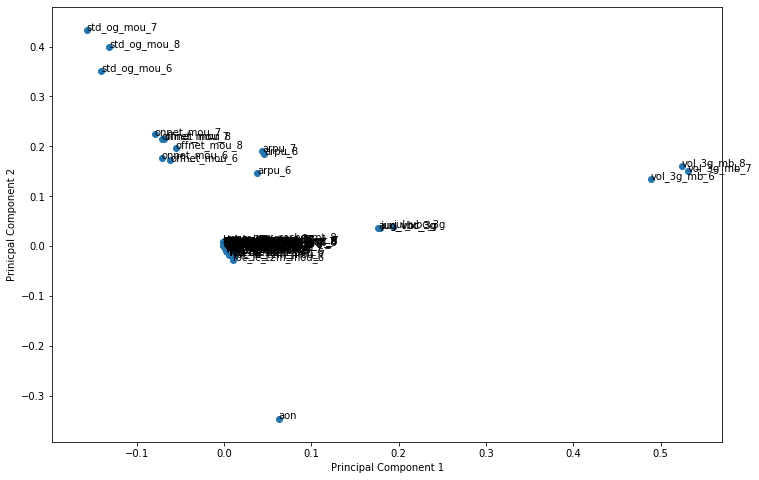

In [ ]:
# Plot to visulize these features
fig = plt.figure(figsize=(12,8))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Prinicpal Component 2')
for i, y in enumerate (pca_df.Features):
    plt.annotate(y,(pca_df.PC1[i],pca_df.PC2[i]))
plt.show()

In [ ]:
# Importing Incremental PCA

from sklearn.decomposition import IncrementalPCA
pca1 = IncrementalPCA(n_components=12)

In [ ]:
X_train_pca = pca1.fit_transform(X_tr_pca)
print(X_train_pca.shape)

X_te_pca = X_test.drop(['mobile_number'], axis=1)
X_test_pca = pca1.transform(X_te_pca)
print(X_test_pca)

(21007, 12)
[[ -763.03615895   434.68825675  -688.59992358 ...    31.38899976
    -29.72256203  -111.98758697]
 [ -976.42630555  1159.145716    -366.78129724 ...   -61.05218587
     75.64183676   666.63110423]
 [ 2108.94255117 -1052.92142659  1027.10711373 ...  -369.12482963
     70.51069083    87.11206654]
 ...
 [ 1230.67311997  1121.32285027  -607.45332341 ...  -238.21467023
     89.33338873   543.80470821]
 [ -589.15691664   -72.73893832  -330.22819288 ...   -26.48528309
    -44.71385874   189.26978504]
 [  947.73326924  -778.23223778  -255.35252956 ...  -334.44494302
    -31.34846211  -511.75269054]]


In [ ]:
X_train_pca

array([[ -629.25477782,   192.00206294, -1121.33591582, ...,
          -43.25990806,    -2.18938884,    80.16819456],
       [  -30.29035933,  -818.26677887,  -451.17010156, ...,
          -57.35593369,  -163.90790771,   -25.21964824],
       [ -214.04014082, -1103.59358942,   796.99178502, ...,
         -209.90724243,   -11.31838134,   265.02178166],
       ...,
       [ -735.36834876,   553.72598436,  -261.80996988, ...,
          184.58198575,   344.22451452,   184.42015165],
       [ -714.99494574,   436.02221828,  -581.96787628, ...,
         -117.24448266,  -113.48997559,   -42.90758233],
       [ -241.15647686, -1037.23539625,   455.56964448, ...,
          -91.84530422,   -68.28898897,  -159.81733094]])

In [ ]:
pc = np.transpose(X_train_pca)

In [ ]:
pca_df1 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],
                       'PC4':pc[3],'PC5':pc[4],'PC6':pc[5],
                       'PC7':pc[6],'PC8':pc[7],'PC9':pc[8],
                       'PC10':pc[9],'PC11':pc[10],'PC12':pc[11]})
pca_df1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-629.254778,192.002063,-1121.335916,-481.776855,-22.181187,-187.506982,35.046886,54.602659,-17.169784,-43.259908,-2.189389,80.168195
1,-30.290359,-818.266779,-451.170102,117.869975,119.312120,-241.338069,-117.384938,55.694432,-87.217009,-57.355934,-163.907908,-25.219648
2,-214.040141,-1103.593589,796.991785,176.699630,-112.027221,-253.013530,98.614243,-86.620621,37.913427,-209.907242,-11.318381,265.021782
3,-529.398094,-306.807342,1325.027102,-74.172009,-391.449410,-12.033689,87.829300,-395.728994,20.442680,26.145222,13.823869,-114.967743
4,-479.127869,-175.020503,-920.318561,266.868464,89.036452,150.864598,-94.062553,60.764378,-10.208647,-147.862864,-78.785636,134.291591


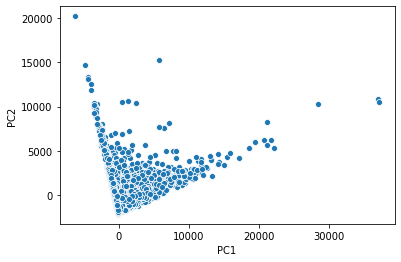

In [ ]:
# Visualizing the PCs

sns.scatterplot(x='PC1',y='PC2',data=pca_df1)

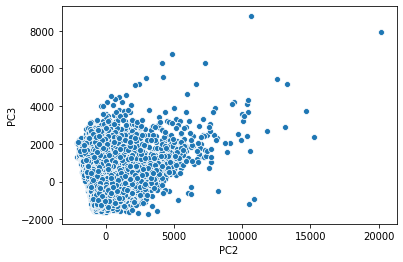

In [ ]:
sns.scatterplot(x='PC2',y='PC3',data=pca_df1)

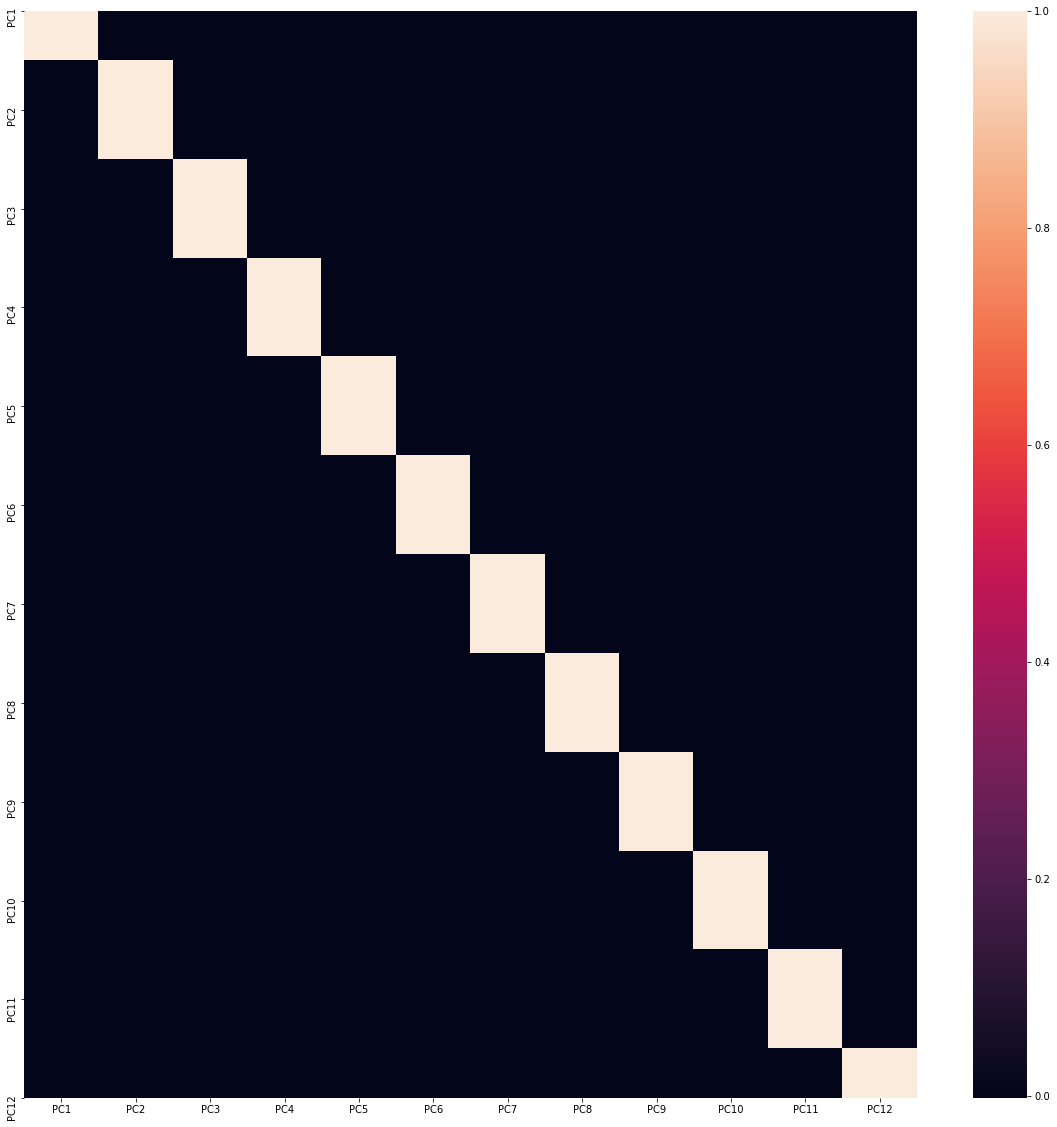

In [ ]:
# Correlation matrix of PCs
plt.figure(figsize=(20,20))
sns.heatmap(pca_df1.corr())
plt.show()

### Logistic Regression with PCA

In [ ]:
# Importing the required library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
l_pca = LogisticRegression(class_weight='balanced')
l_pca.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicted probability
y_pred = l_pca.predict(X_test_pca)

# Converting predicted values to a dataframe
df_y_pred = pd.DataFrame(y_pred)

In [ ]:
# Importing required library

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.7506663705019991

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

# Sensitivity
print(TP/float(TP+FN))

# Specificity
print(TN/float(TN+FP))

0.7584415584415585
0.7499392761719699


### Random forest
#### Without PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [ ]:
#class weight to handle class imbalance
forest = RandomForestClassifier(class_weight='balanced_subsample')

# hyperparameter space
params = {'max_depth':[10,15], 'min_samples_leaf':range(50,100),
         'min_samples_split':range(50,100),
         'n_estimators':[200,300], 'max_features':[20,30]}

# create gridsearch object
rf = GridSearchCV(estimator=forest, cv=3, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
rf.fit(X_train, y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 107.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 182.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 288.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 412.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 414.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                   

In [ ]:
# print best hyperparameters
print("Best AUC: ", rf.best_score_)
print("Best hyperparameters: ", rf.best_params_)

Best AUC:  0.9380052917704709
Best hyperparameters:  {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [ ]:
# Model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced_subsample',
                            max_depth=10,
                            max_features=30,
                            min_samples_leaf=50,
                            min_samples_split=50,
                            n_estimators=300)

In [ ]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=10, max_features=30,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
# Evaluation metrics
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95      8234
         1.0       0.48      0.84      0.61       770

    accuracy                           0.91      9004
   macro avg       0.73      0.88      0.78      9004
weighted avg       0.94      0.91      0.92      9004



In [ ]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6175 2059]
 [ 186  584]]
Sensitivity: 	0.84
Specificity: 	0.91
ROC:    	 0.95


In [ ]:
# predictors
features = X_train.columns

# feature_importance
importance = rfc.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,roam_ic_mou_8,18.494937
1,roam_og_mou_8,15.824221
2,arpu_8,11.341412
3,last_day_rch_amt_8,9.674901
4,date_of_last_rech_8,7.033461
...,...,...
95,sachet_3g_6,0.004139
96,sachet_2g_7,0.003380
97,spl_ic_mou_7,0.003078
98,og_others_7,0.000000


In [ ]:
#top features
top_features = feature_importance.variables[0:10]

In [ ]:
top_features

0          roam_ic_mou_8
1          roam_og_mou_8
2                 arpu_8
3     last_day_rch_amt_8
4    date_of_last_rech_8
5       loc_ic_t2f_mou_8
6         max_rech_amt_8
7       loc_og_t2f_mou_8
8       loc_ic_t2t_mou_8
9       total_rech_num_7
Name: variables, dtype: object

### Decision Tree to identify important Features for Prediction

In [ ]:

from sklearn.tree import DecisionTreeClassifier


dt_default = DecisionTreeClassifier(max_depth=10,class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      8234
         1.0       0.40      0.77      0.52       770

    accuracy                           0.88      9004
   macro avg       0.69      0.83      0.73      9004
weighted avg       0.93      0.88      0.90      9004



In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7333  901]
 [ 179  591]]
0.8800533096401599


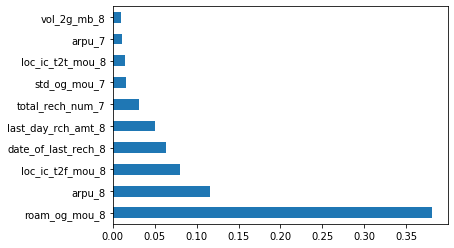

In [ ]:
feat_importances = pd.Series(dt_default.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

So the derived columns are : 

In [ ]:
feat_importances.nlargest(10)

roam_og_mou_8          0.380509
arpu_8                 0.115407
loc_ic_t2f_mou_8       0.079872
date_of_last_rech_8    0.063083
last_day_rch_amt_8     0.049849
total_rech_num_7       0.030824
std_og_mou_7           0.016092
loc_ic_t2t_mou_8       0.015035
arpu_7                 0.010900
vol_2g_mb_8            0.010320
dtype: float64

As per the above ranking of few variables and their importance, if their values decrese the likelyhood of customer churn increases and if their values increase then customer won't churn. The same has been confirmed during EDA. Let's consider arpu_8 for validation, customers who churned generated a significantly lesser amount than who didn't and same has been captured by the model.

Out of all three models, random forest got the best metric, recall - 0.84 for churn. We chose sensitivity/recall for evaluation as we're trying to identify all the churners. However GridSearchCV also took 7 hours for processing the best hyperparameters for optimal results.